# DATA DESC
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor vari- ables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    - <70 = hypoglicemic
    - 70 - 100 = normal
    - 100 - 126 = pre-diabetic
    - 126 - 180 = diabetic
    - .> 180 = hyperglycemic
    - Taken from https://dtc.ucsf.edu/types-of-diabetes/type2/understanding-type-2-diabetes/basic-facts/diagnosing-diabetes/#oral
- BloodPressure: Diastolic blood pressure (mm Hg)
    - <90 = Low
    - 90-119 = Normal
    - 120 - 129 = Elevated
    - 130 - 139 = High Stage 1
    - 140 - 180 = High stage 2
    - .>180 = Hypertensive
    - Source: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)2)
    - < 18.5 = Underweight
    - 18.5 - 24.9 = Healthy
    - 25 - 29.9 = Overweight
    - .>=30 = Obese
        - 30 - 34.9 = Obese Class 1
        - 35 - 39.9 = Obese Class 2
        - .>= 40 = Obese Class 3 (Severe Obesity)
    - Source: https://www.cdc.gov/obesity/basics/adult-defining.html
- DiabetesPedigreeFunction: Diabetes pedigree function -> the likelihood of someone having diabetes (probably in %)
- Age:Age(years)
- Outcome: Classvariable(0 or 1)

# MAIN GOAL
To create a Machine Learning model that can predict/detect if someone is diabetic or not.

# 1. IMPORTING  PACKAGES AND DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as ply
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/vanindraa/vanindrarepo/Dataset/Dataset9_Diabetes_Prediction.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Simplifying feature's name
data.rename(columns={'DiabetesPedigreeFunction' : 'Diabetes_Chance'}, inplace=True)

In [ ]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

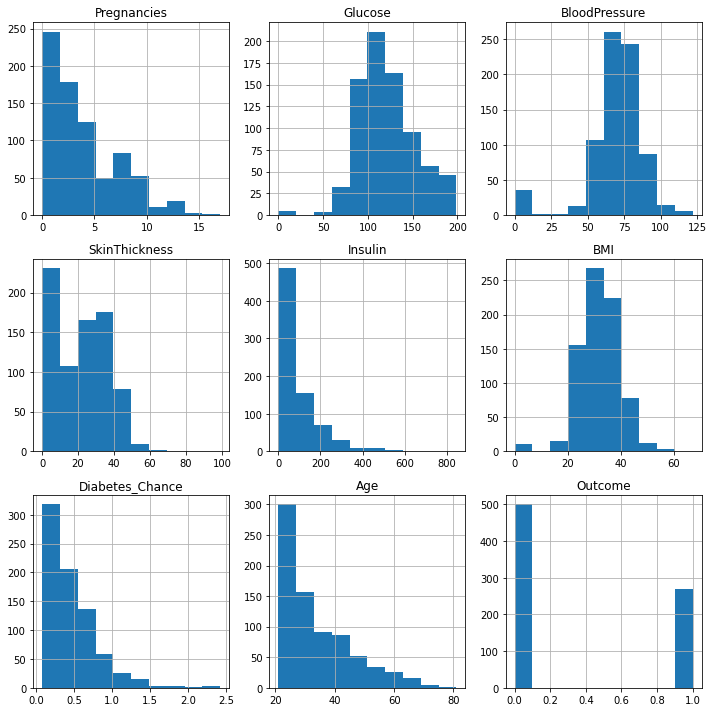

In [ ]:
#Distribusi data raw
data.hist()
plt.show()

In [ ]:
data.shape

(768, 9)

dataset diabetes prediction memiliki 768 rows dan 9 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pregnancies      768 non-null    int64  
 1   Glucose          768 non-null    int64  
 2   BloodPressure    768 non-null    int64  
 3   SkinThickness    768 non-null    int64  
 4   Insulin          768 non-null    int64  
 5   BMI              768 non-null    float64
 6   Diabetes_Chance  768 non-null    float64
 7   Age              768 non-null    int64  
 8   Outcome          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isnull().sum()

Pregnancies        0
Glucose            0
BloodPressure      0
SkinThickness      0
Insulin            0
BMI                0
Diabetes_Chance    0
Age                0
Outcome            0
dtype: int64

No null so it is good, but let's check the complete descrtiption

### Profiling Descriptive Stats

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_Chance,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Key takeaway: In this data, we are going to focus on the feature 'Outcome' as it is what we are trying to predict and it is the target for this dataset. For the model itself, because we are classifying who is diabetes and who is not, we are going to use the classification model and not regression. As for the info from the table above, not much can be extracted from the feature'Outcome'. However, I am sure there are some nonsensical values: Glucose, BloodPressure, SkinThickness, and BMI can't reach 0. Therefore, we treat them as missing value.

#### Replacing missing values

In [ ]:
data['BMI']=data['BMI'].replace([0],data['BMI'].median())
data['Glucose']=data['Glucose'].replace([0],data['Glucose'].median())
data['BloodPressure']=data['BloodPressure'].replace([0],data['BloodPressure'].median())
data['SkinThickness']=data['SkinThickness'].replace([0],data['SkinThickness'].median())
data['Insulin']=data['Insulin'].replace([0],data['SkinThickness'].median())
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_Chance,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,91.000000,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,107.812757,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,23.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


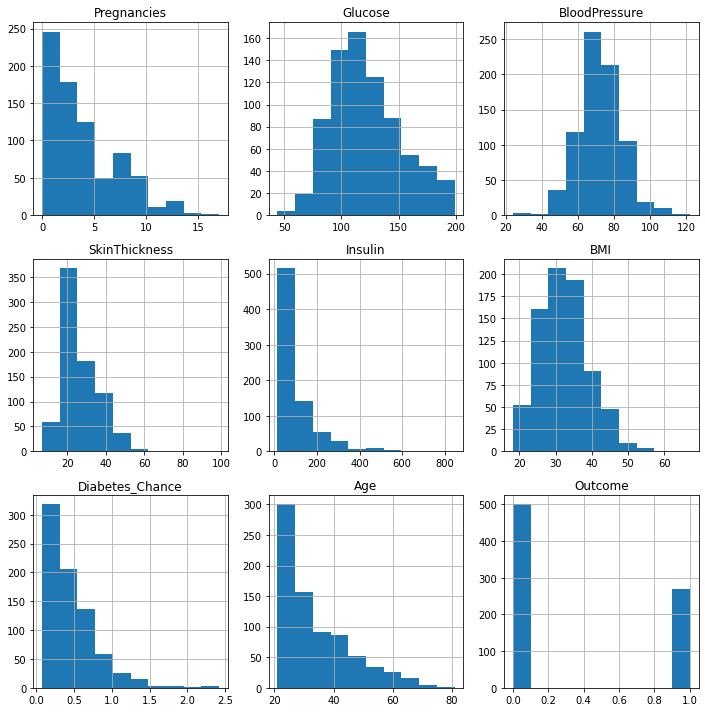

In [ ]:
#Distribusi data setelah missing value (0) diisi dengan median
data.hist()
plt.show()

# 2. DATA PREPROCESSING

## Pregnancies Feature

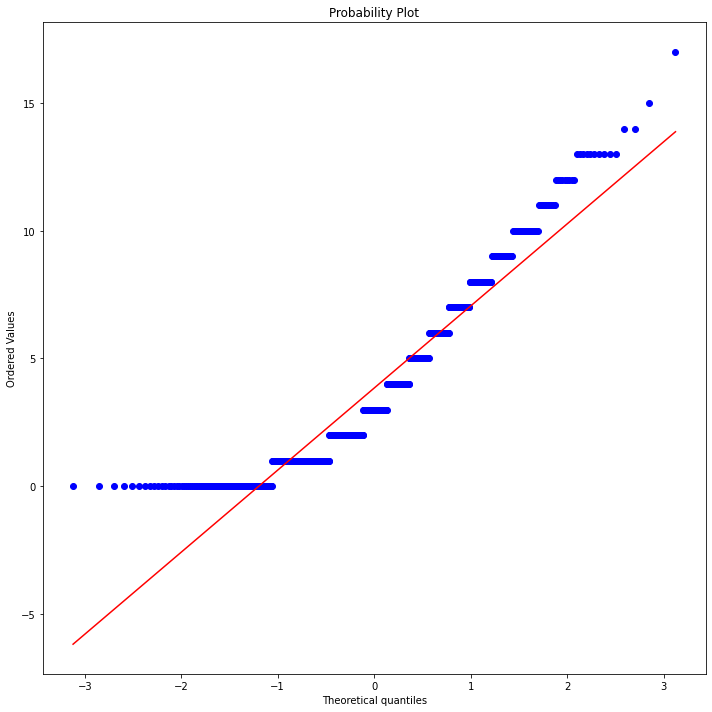

In [ ]:
#QQ-Plot
stats.probplot(data['Pregnancies'], dist='norm',plot=py)
py.show()

Key takeaway, this is not even close to being standard.

### Finding Outliers

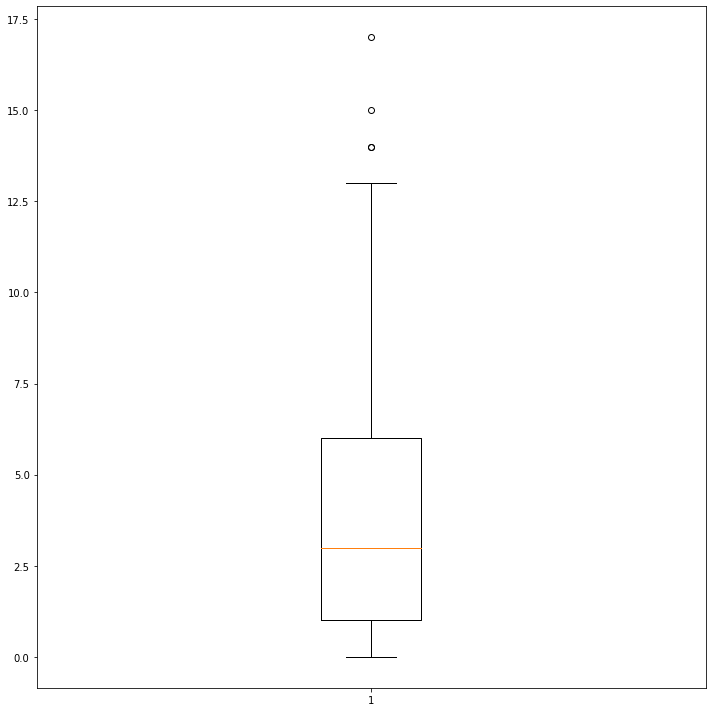

In [ ]:
plt.boxplot(data['Pregnancies'])
plt.show()

In [ ]:
Q1 = np.percentile(data.Pregnancies,25)
Q3 = np.percentile(data.Pregnancies,75)
IQR = (Q3-Q1)
print("IQR sama dengan", IQR)

IQR sama dengan 5.0


In [ ]:
Lbound = Q1-(IQR*1.5)
Ubound = Q3+(IQR*1.5)
print('Lower Bound =',Lbound)
print('Upper Bound =',Ubound)

Lower Bound = -6.5
Upper Bound = 13.5


In [ ]:
data.loc[(data['Pregnancies']<Lbound)|(data['Pregnancies']>Ubound)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_Chance,Age,Outcome
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1
455,14,175.0,62.0,30.0,23.0,33.6,0.212,38,1


Key takeaway: Outliers untuk fitur pregnancies berada pada value di bawah -6.5 dan di atas 13.5.Terdapat empat row yang berada pada range itu dan merupakan outlier. Solusinya, di drop.

## Glucose Feature

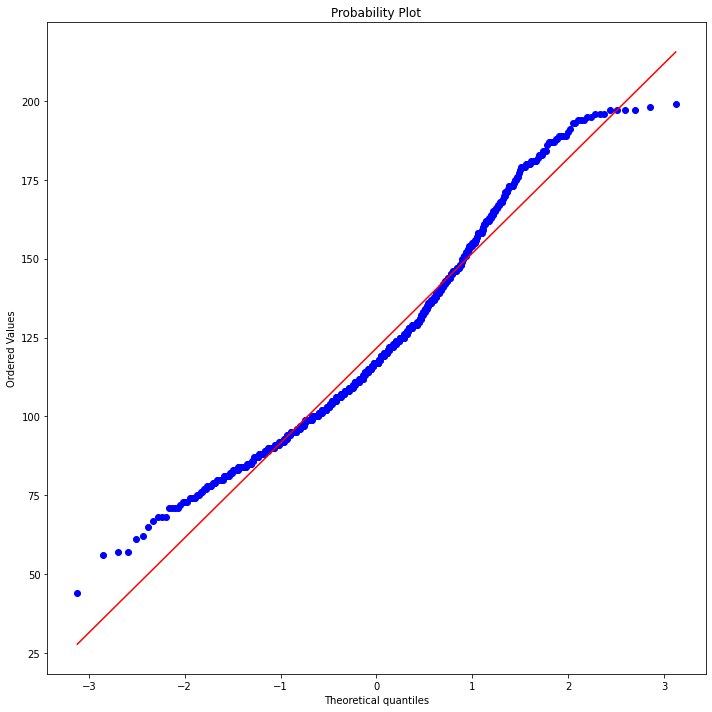

In [ ]:
#QQ-Plot
stats.probplot(data['Glucose'], dist='norm',plot=py)
py.show()

Key Takeaway: Berdasarkan QQplot, dapat dilihat bahwa fitur Glocose mendekati persebaran normal

### Finding Outliers

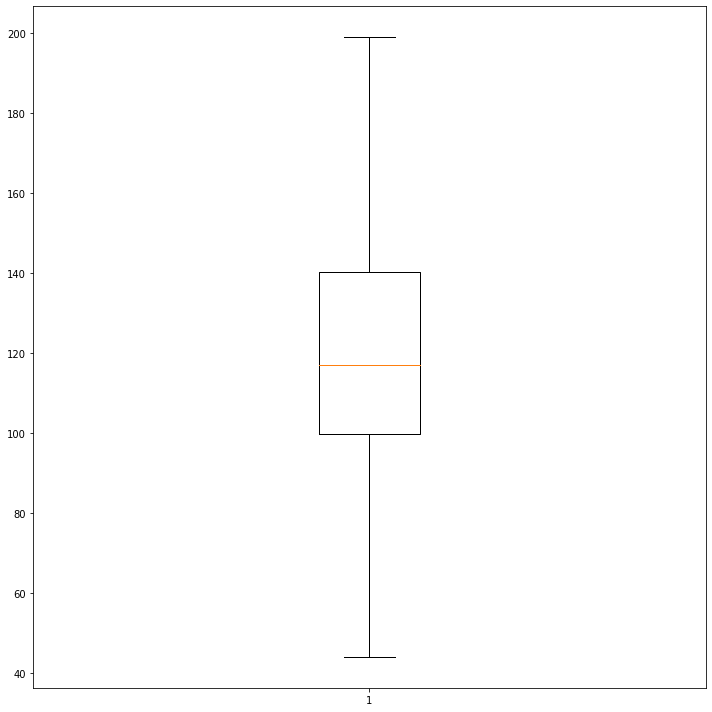

In [ ]:
plt.boxplot(data['Glucose'])
plt.show()

In [ ]:
Q1 = np.percentile(data.Glucose,25)
Q3 = np.percentile(data.Glucose,75)
IQR = (Q3-Q1)
print("IQR sama dengan", IQR)

IQR sama dengan 40.5


In [ ]:
Lbound = Q1-(IQR*1.5)
Ubound = Q3+(IQR*1.5)
print('Lower Bound =',Lbound)
print('Upper Bound =',Ubound)

Lower Bound = 39.0
Upper Bound = 201.0


In [ ]:
data.loc[(data['Glucose']<Lbound)|(data['Glucose']>Ubound)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_Chance,Age,Outcome


Key takeaway: Tidak ada outliers untuk fitur Glucose

## BloodPressure Feature

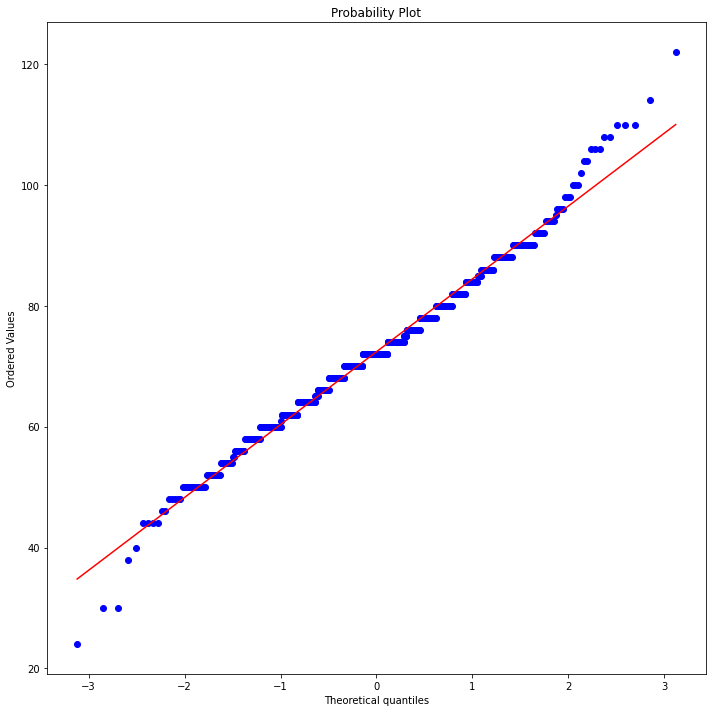

In [ ]:
#QQ-Plot
stats.probplot(data['BloodPressure'], dist='norm',plot=py)
py.show()

Key Takeaway: Titik-titik pada QQplot diatas menunjukkan jika persebaran hampir normal untuk fitur BloodPressure.

### Finding Outliers

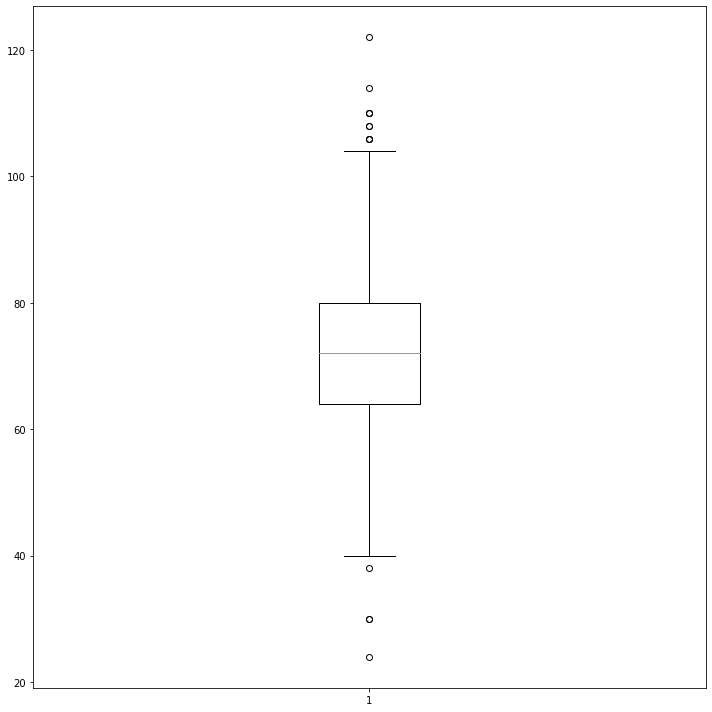

In [ ]:
plt.boxplot(data['BloodPressure'])
plt.show()

In [ ]:
Q1 = np.percentile(data.BloodPressure,25)
Q3 = np.percentile(data.BloodPressure,75)
IQR = (Q3-Q1)
Lbound = Q1-(IQR*1.5)
Ubound = Q3+(IQR*1.5)
print("IQR sama dengan", IQR)
print('Lower Bound =',Lbound)
print('Upper Bound =',Ubound)

IQR sama dengan 16.0
Lower Bound = 40.0
Upper Bound = 104.0


In [ ]:
data.loc[(data['BloodPressure']<Lbound)|(data['BloodPressure']>Ubound)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_Chance,Age,Outcome
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
43,9,171.0,110.0,24.0,240.0,45.4,0.721,54,1
84,5,137.0,108.0,23.0,23.0,48.8,0.227,37,1
106,1,96.0,122.0,23.0,23.0,22.4,0.207,27,0
125,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
362,5,103.0,108.0,37.0,23.0,39.2,0.305,65,0
549,4,189.0,110.0,31.0,23.0,28.5,0.680,37,0
597,1,89.0,24.0,19.0,25.0,27.8,0.559,21,0
599,1,109.0,38.0,18.0,120.0,23.1,0.407,26,0


In [ ]:
#jumlah row outlier BloodPressure
outlier_outlier1 = data.loc[(data['BloodPressure']<Lbound)|(data['BloodPressure']>Ubound)]
outlier_outlier1['BloodPressure'].count()

14

Key Takeaway: Outliers untuk fitur BloodPressure berada pada value di bawah 40 dan di atas 104. Jumlah outliers pada fitur ini adalah 14 buah

## Skin Thickness Feature

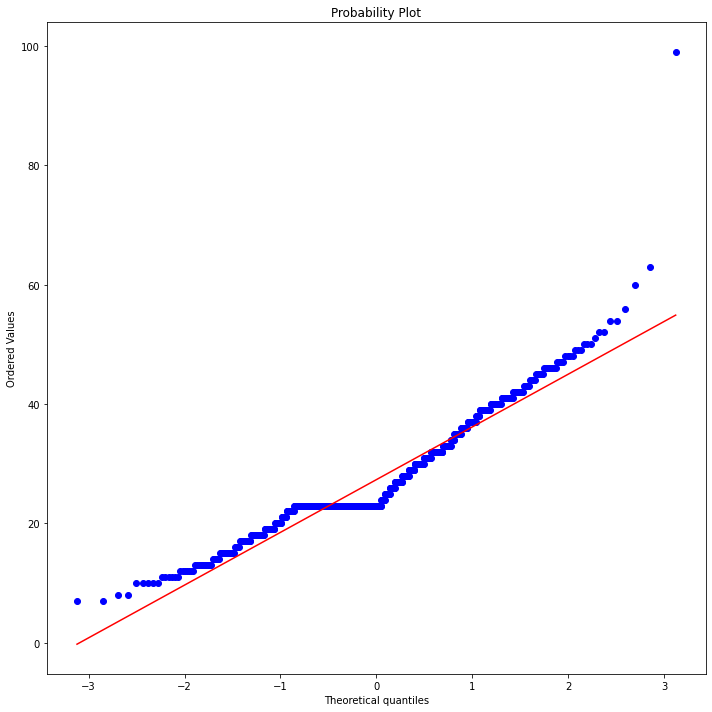

In [ ]:
#QQ-Plot
stats.probplot(data['SkinThickness'], dist='norm',plot=py)
py.show()

Key Takeaway: Berdasarkan titik-titik di visualisasi tersebut, sebaran fitur Skin Thickness tidak menunjukkan sebaran normal

### Finding Outliers

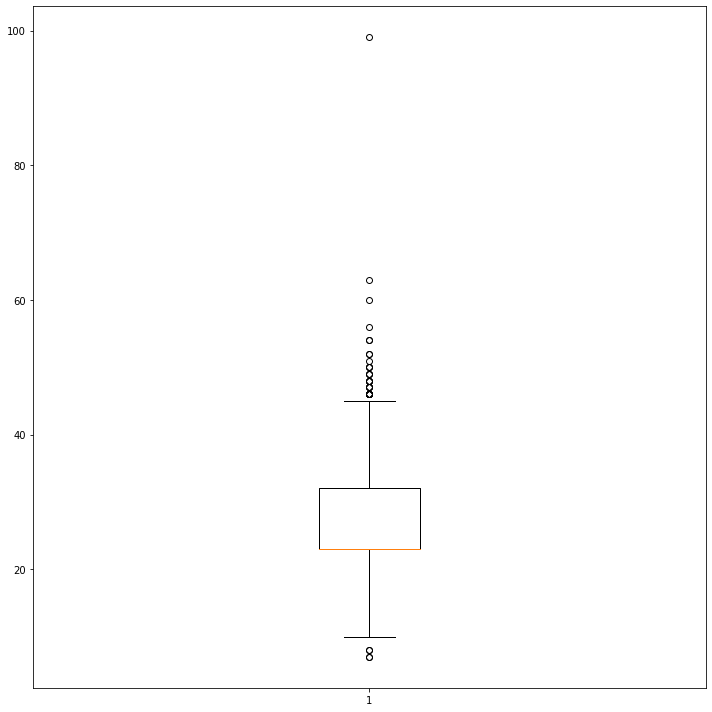

In [ ]:
plt.boxplot(data['SkinThickness'])
plt.show()

In [ ]:
Q1 = np.percentile(data.SkinThickness,25)
Q3 = np.percentile(data.SkinThickness,75)
IQR = (Q3-Q1)
Lbound = Q1-(IQR*1.5)
Ubound = Q3+(IQR*1.5)
print("IQR sama dengan", IQR)
print('Lower Bound =',Lbound)
print('Upper Bound =',Ubound)

IQR sama dengan 9.0
Lower Bound = 9.5
Upper Bound = 45.5


In [ ]:
data.loc[(data['SkinThickness']<Lbound)|(data['SkinThickness']>Ubound)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_Chance,Age,Outcome
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
39,4,111.0,72.0,47.0,207.0,37.1,1.390,56,1
57,0,100.0,88.0,60.0,110.0,46.8,0.962,31,0
86,13,106.0,72.0,54.0,23.0,36.6,0.178,45,0
99,1,122.0,90.0,51.0,220.0,49.7,0.325,31,1
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
150,1,136.0,74.0,50.0,204.0,37.4,0.399,24,0
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
211,0,147.0,85.0,54.0,23.0,42.8,0.375,24,0
254,12,92.0,62.0,7.0,258.0,27.6,0.926,44,1


In [ ]:
#jumlah row outlier SkinThickness
outlier_outlier2 = data.loc[(data['SkinThickness']<Lbound)|(data['SkinThickness']>Ubound)]
outlier_outlier2['SkinThickness'].count()

35

Key Takeaway: Outliers pada fitur Skin Thickness berada pada value di bawah 3.3 dan di atas 49.1. Jumlah outliers pada fitur ini adalah 35 buah

## Insulin Feature

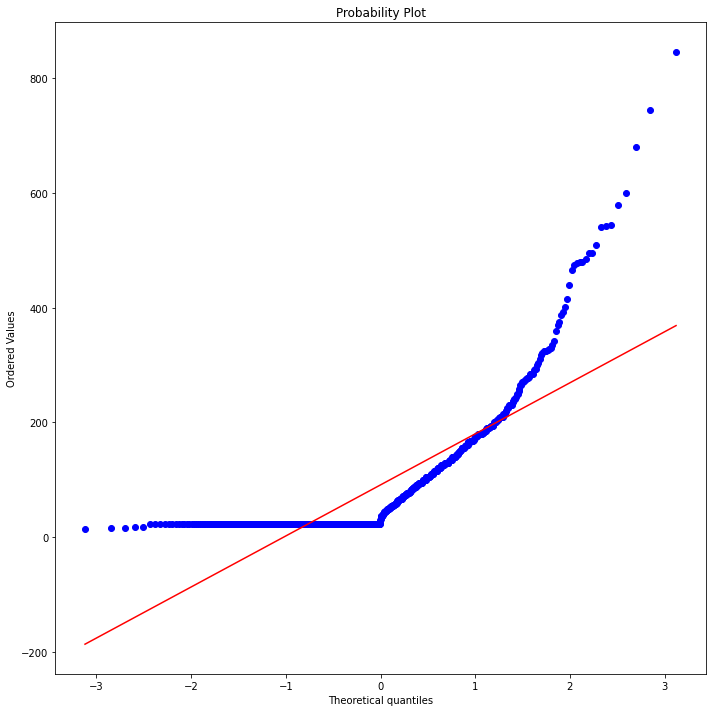

In [ ]:
#QQ-Plot
stats.probplot(data['Insulin'], dist='norm',plot=py)
py.show()

Key takeaway: Berdasarkan QQplot, terlihat bahwa titik-titik  di atas menjauhi garis tengah sehingga dapat disimpulkan jika persebarannya tidak merata. Selain itu, fitur insulin juga terdapat outliers

### Finding Outliers

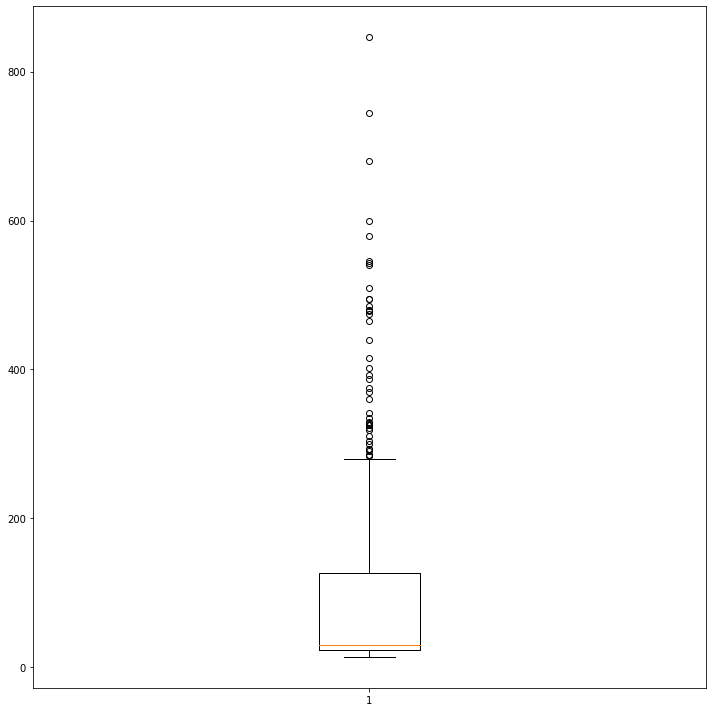

In [ ]:
plt.boxplot(data['Insulin'])
plt.show()

In [ ]:
Q1 = np.percentile(data.Insulin,25)
Q3 = np.percentile(data.Insulin,75)
IQR = (Q3-Q1)
Lbound = Q1-(IQR*1.5)
Ubound = Q3+(IQR*1.5)
print("IQR sama dengan", IQR)
print('Lower Bound =',Lbound)
print('Upper Bound =',Ubound)

IQR sama dengan 104.25
Lower Bound = -133.375
Upper Bound = 283.625


In [ ]:
data.loc[(data['Insulin']<Lbound)|(data['Insulin']>Ubound)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_Chance,Age,Outcome
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
53,8,176.0,90.0,34.0,300.0,33.7,0.467,58,1
54,7,150.0,66.0,42.0,342.0,34.7,0.718,42,0
56,7,187.0,68.0,39.0,304.0,37.7,0.254,41,1
111,8,155.0,62.0,26.0,495.0,34.0,0.543,46,1
139,5,105.0,72.0,29.0,325.0,36.9,0.159,28,0
144,4,154.0,62.0,31.0,284.0,32.8,0.237,23,0
153,1,153.0,82.0,42.0,485.0,40.6,0.687,23,0
162,0,114.0,80.0,34.0,285.0,44.2,0.167,27,0


In [ ]:
#jumlah row outlier Insulin
outlier_outlier3 = data.loc[(data['Insulin']<Lbound)|(data['Insulin']>Ubound)]
outlier_outlier3['Insulin'].count()

44

Key Takeaway: Outlier pada fitur Insulin berada pada value di bawah -122.5 dan di atas value 265.5. DIdasarkan pada boxplot, outlier hanya ada di area yang melebihi upperbound. Jumlah outliers pada fitur ini adalah 44 buah.

## BMI Feature

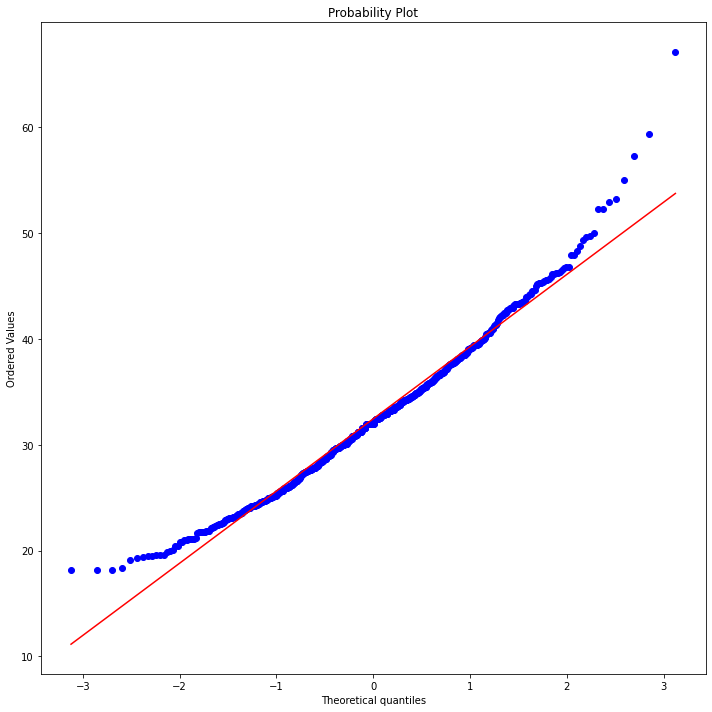

In [ ]:
#QQ-Plot
stats.probplot(data['BMI'], dist='norm',plot=py)
py.show()

Key Takeaway: Berdasarkan QQplot, terlihat bahwa titik-titik rata-rata menempel dan mendekati garis tengah sehingga menunjukkan bahwa sebaran BMI ada yang menyebar secara normal.

### Finding Outliers

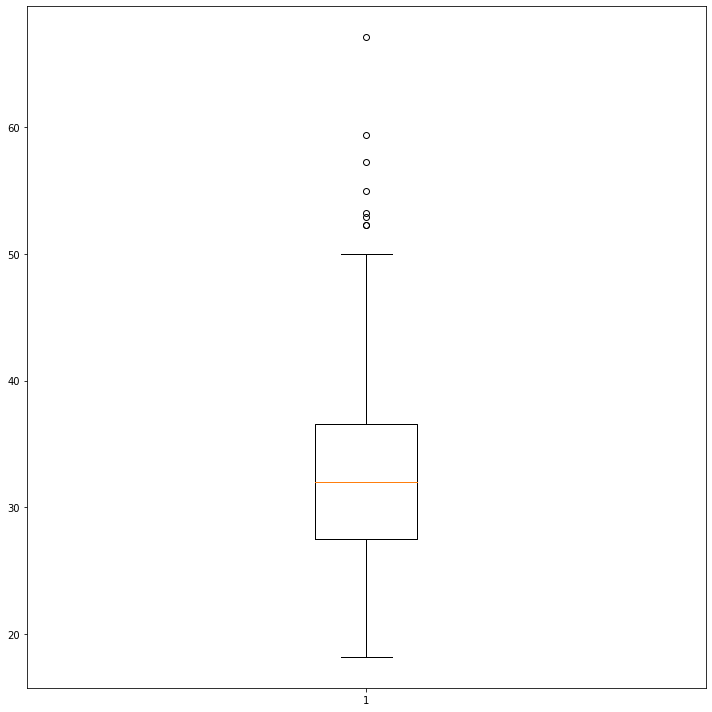

In [ ]:
plt.boxplot(data['BMI'])
plt.show()

In [ ]:
Q1 = np.percentile(data.BMI,25)
Q3 = np.percentile(data.BMI,75)
IQR = (Q3-Q1)
Lbound = Q1-(IQR*1.5)
Ubound = Q3+(IQR*1.5)
print("IQR sama dengan", IQR)
print('Lower Bound =',Lbound)
print('Upper Bound =',Ubound)

IQR sama dengan 9.100000000000001
Lower Bound = 13.849999999999998
Upper Bound = 50.25


In [ ]:
data.loc[(data['BMI']<Lbound)|(data['BMI']>Ubound)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_Chance,Age,Outcome
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
125,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
193,11,135.0,72.0,23.0,23.0,52.3,0.578,40,1
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,0
303,5,115.0,98.0,23.0,23.0,52.9,0.209,28,1
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1
673,3,123.0,100.0,35.0,240.0,57.3,0.880,22,0


In [ ]:
#jumlah row outlier BMI
outlier_outlier4 = data.loc[(data['BMI']<Lbound)|(data['BMI']>Ubound)]
outlier_outlier4['BMI'].count()

8

Key Takeaway: Outlier pada fitur BMI berada pada value di bawah 14.5 dan di atas value 49. DIdasarkan pada boxplot, outlier hanya ada di area yang melebihi upperbound. Jumlah outliers pada fitur ini adalah 8 buah

## All the histogram

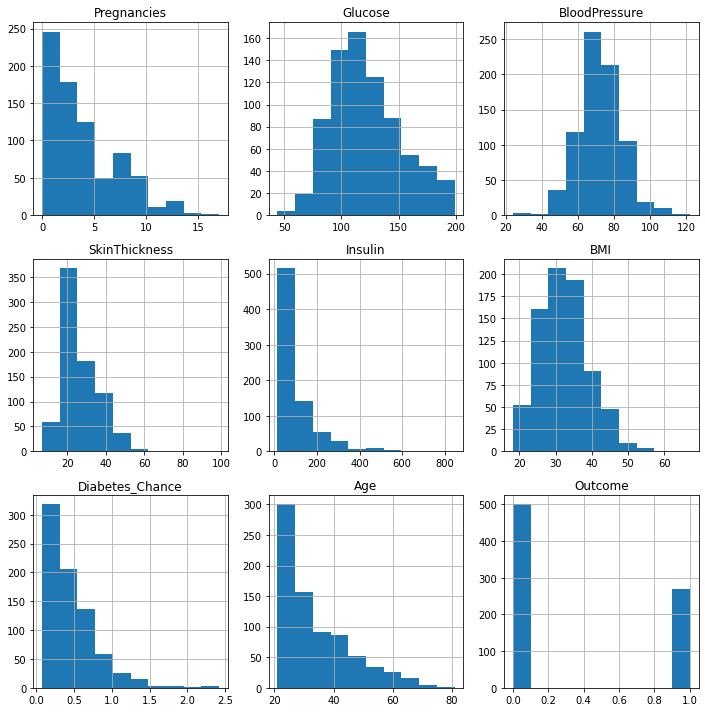

In [ ]:
#All Histogram
data.hist()
plt.show()

Key Takeaway: Tidak ada data yang memiliki persebaran normal sempurna. Fitur yang mendekati persebaran normal adalah Glucose, BMI, dan Blood Pressure. Fitur Diabetes Chance, Age, Insulin, dan Pregnancies persebarannya skew ke kanan.

## Pair Plot

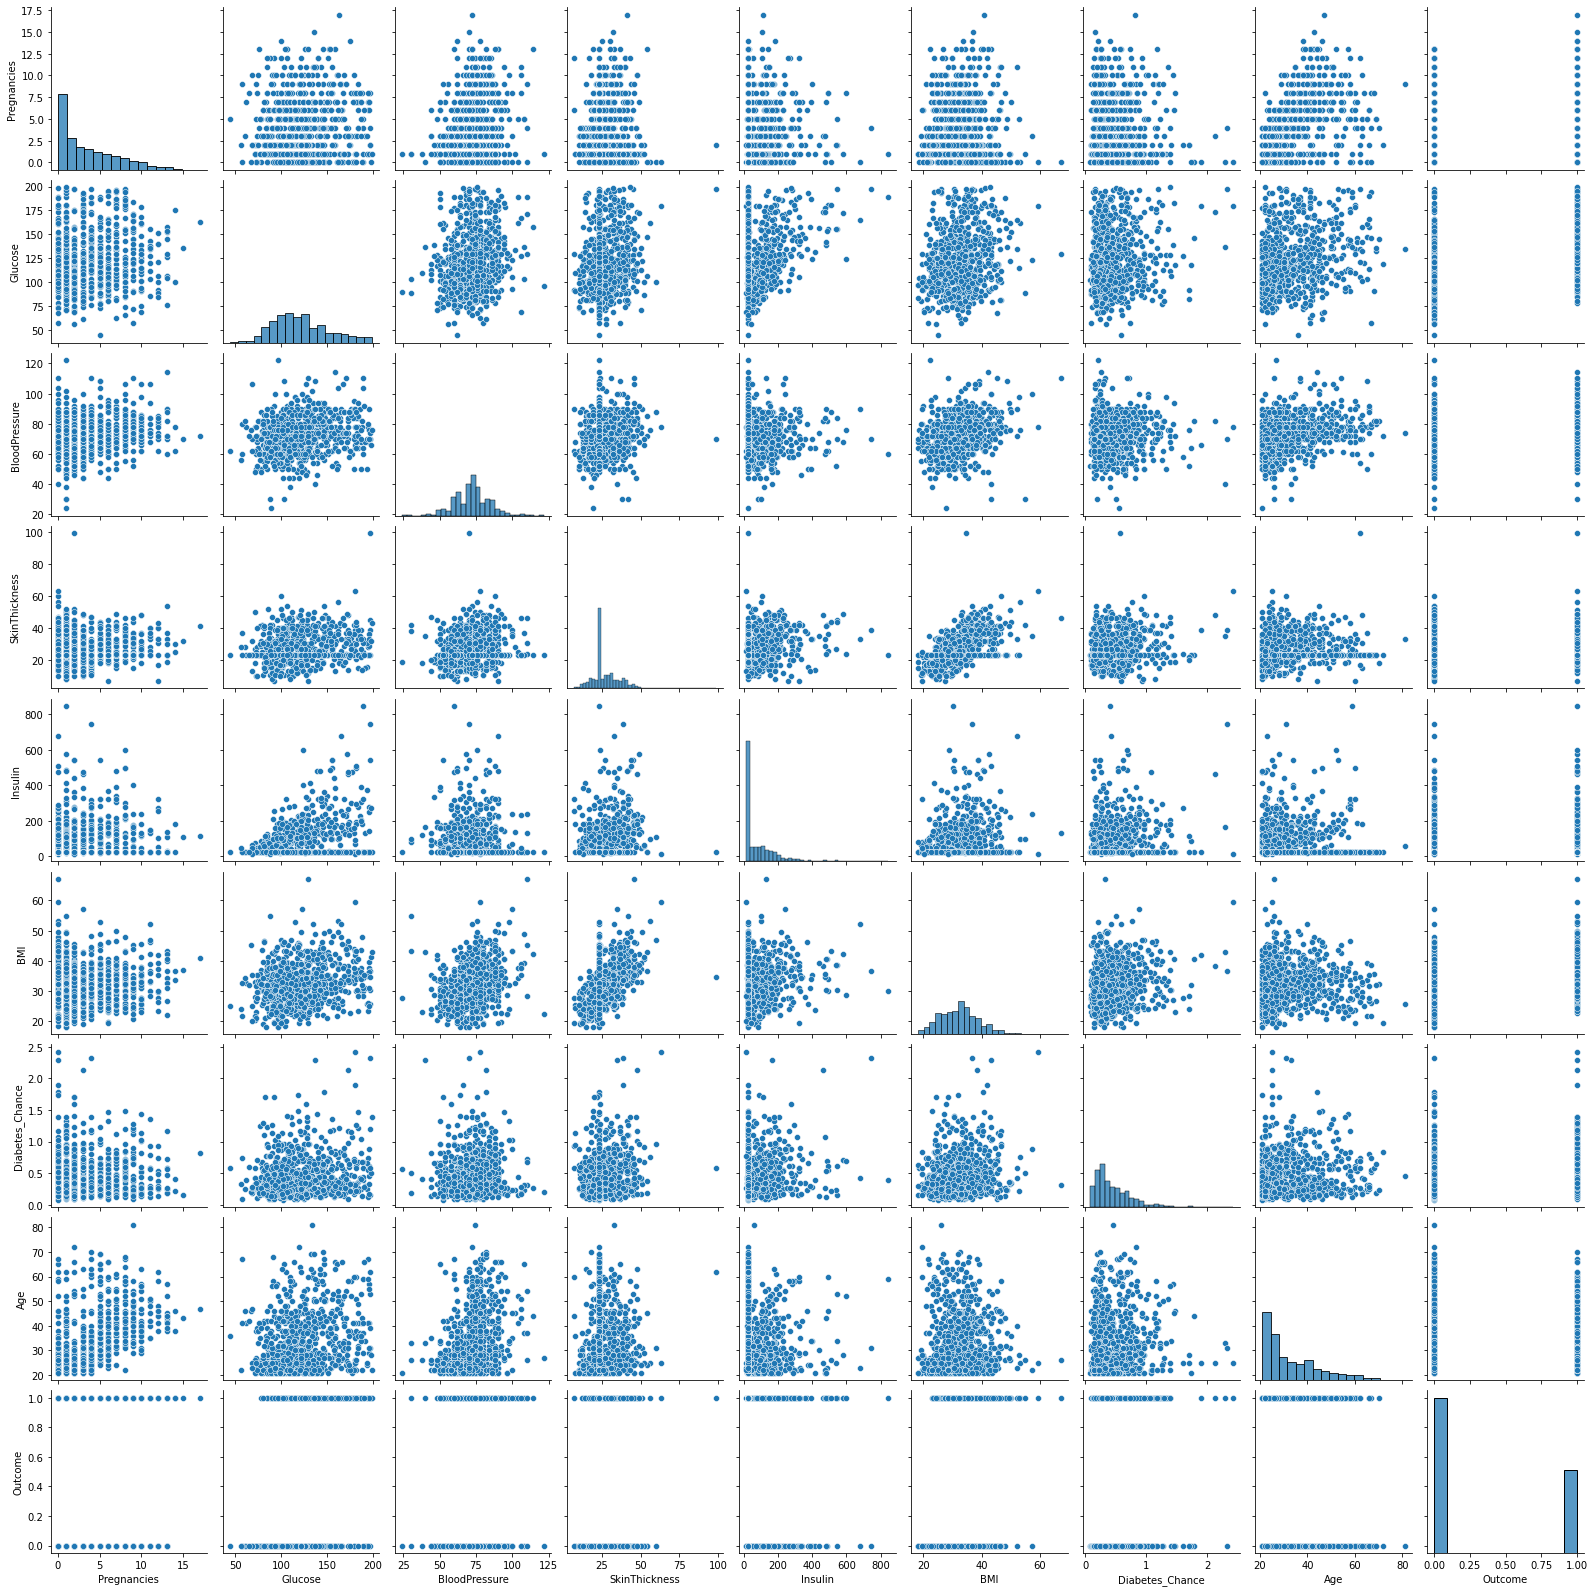

In [ ]:
#Data Pairplot
sns.pairplot(data)

## CatPlot

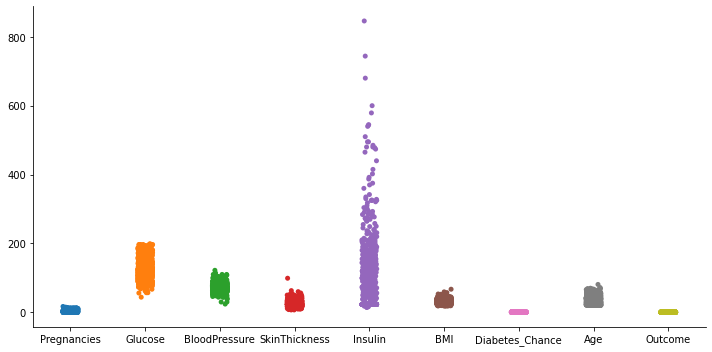

In [ ]:
sns.catplot(data=data, height=5, aspect=2)

## Data Shape after finding outliers 

In [ ]:
data.shape

(768, 9)

### Duplicated values

In [ ]:
data[data.duplicated()] #There are no duplicated values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_Chance,Age,Outcome


## Imbalanced Data

In [ ]:
# Ketimpangan data
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [ ]:
data.Outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

Key Takeaaway: Data yang diberikan timpang antara outcome 0 dan 1. Jumlah yang tidak terkena diabetes hampir 2x jumlah yang terkena diabetes. Ini menunjukkan perlunya balancing data dengan oversampling atau undersampling. Namun, secara persentase, outcome 0 memiliki proporsi 31% dari total data sehingga dapat dikatakan data ini mildly imbalanced. (sumber: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)

# 3. EDA

## Correlation Between Features

In [ ]:
corr = data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_Chance,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.060448,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.351170,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.033234,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.240045,0.546951,0.142977,0.054514,0.189065
Insulin,-0.060448,0.351170,-0.033234,0.240045,1.000000,0.188268,0.180077,-0.022461,0.143914
BMI,0.021546,0.231400,0.281132,0.546951,0.188268,1.000000,0.153506,0.025744,0.312249
Diabetes_Chance,-0.033523,0.137327,-0.002378,0.142977,0.180077,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.022461,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.143914,0.312249,0.173844,0.238356,1.000000


<AxesSubplot:>

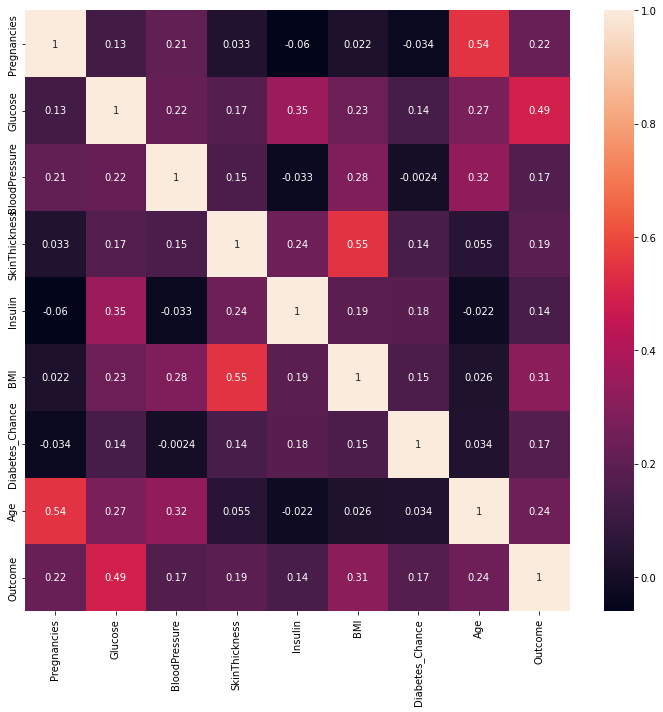

In [ ]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,
            annot=True)

Key Takeaway: Fitur akan dianggap berkorelasi saat koefisiennya >0.5. Jika koefisien berada <0.5, maka fitur tidak dianggap berkorelasi. Untuk fitur outcome sendiri, tidak berkorelasi dengan fitur manapun. Paling dekat adalah fitur 'Glucose' dengan koefisien 0,49 sehingga mungkin dapat dianggap sedikit berkorelasi.

Jika dilihat dari heat map, fitur yang berkaitan adalah BMI dengan Skin Thickness dengan koefisien 0.53, dan fitur Age dengan Pregnancies dengan koefisien 0.54

### Glucose and BMI
We are trying to see if BMI and Glucose actually gives out a good correlation

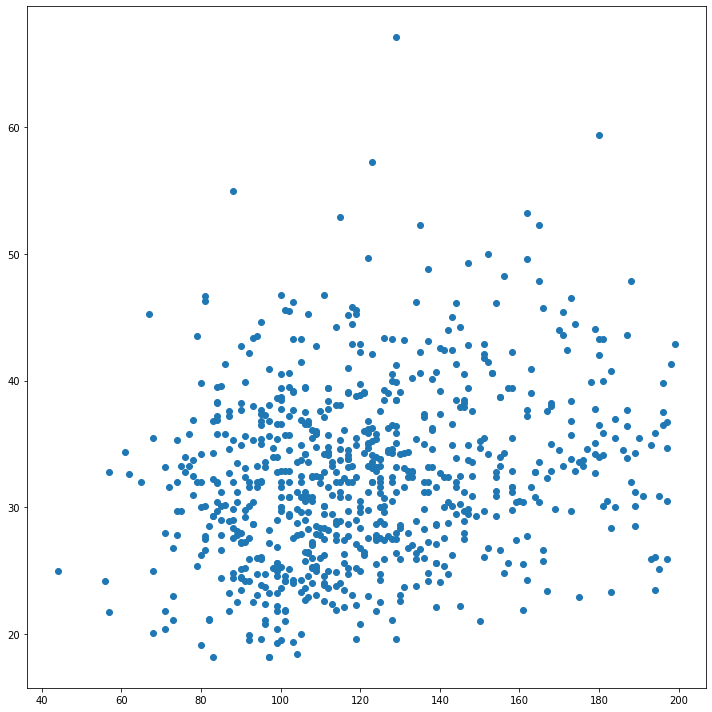

In [ ]:
plt.scatter(data['Glucose'],data['BMI'])
plt.show()

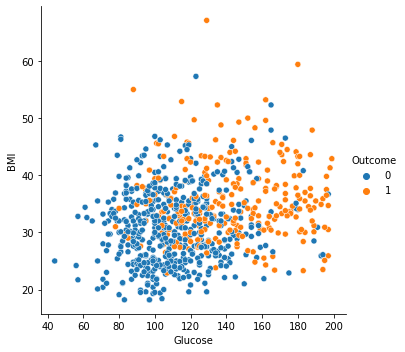

In [ ]:
#Relational plot
sns.relplot(x='Glucose',y='BMI', hue='Outcome',data=data)

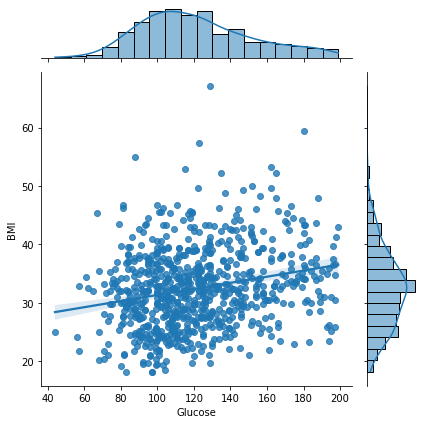

In [ ]:
sns.jointplot(x='Glucose', y='BMI', data=data, kind="reg")

Key takeaway: Glucose dan BMI terlihat memberikan korelasi yang positif jika didasarkan pada garis di atas. Semakin besar glucose (gula darah), maka BMI akan bertambah pula.

### Pregnancies vs BMI

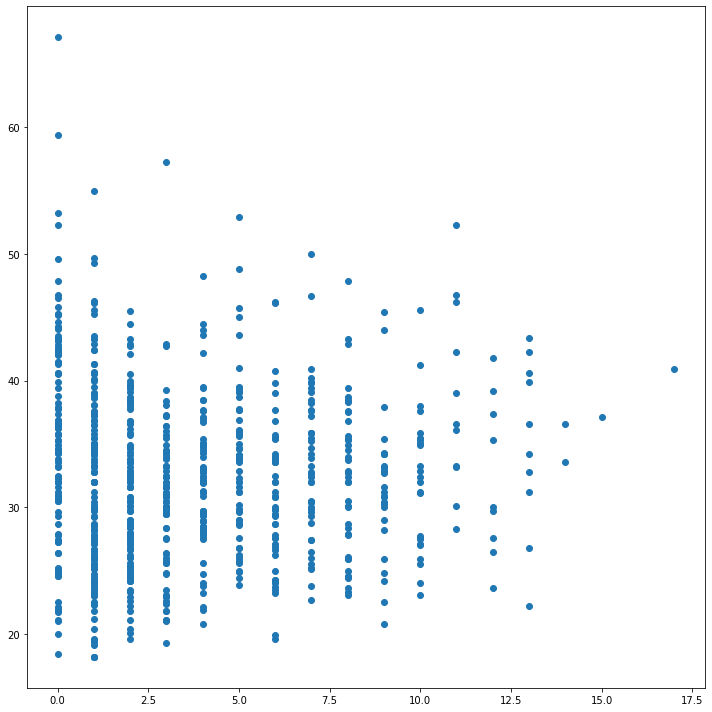

In [ ]:
plt.scatter(data['Pregnancies'],data['BMI'])
plt.show()

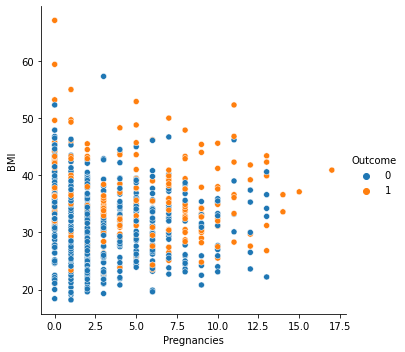

In [ ]:
#Relational plot
sns.relplot(x='Pregnancies',y='BMI', hue='Outcome',data=data)

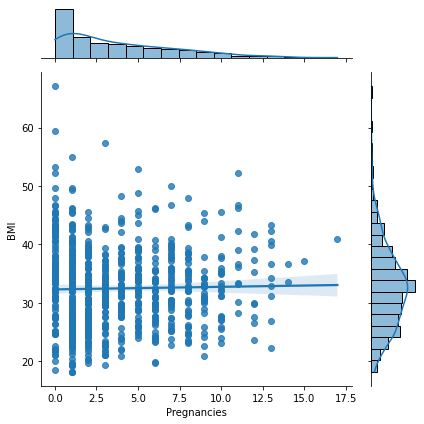

In [ ]:
sns.jointplot(x='Pregnancies', y='BMI', data=data, kind="reg")

Key takeaway: Garis di atas terlihat rata sehingga dapat disimpulkan jika tidak ada hubungan positif maupun negatif antara jumlah kehamilan dengan angka BMI

### Pregnancies vs Age

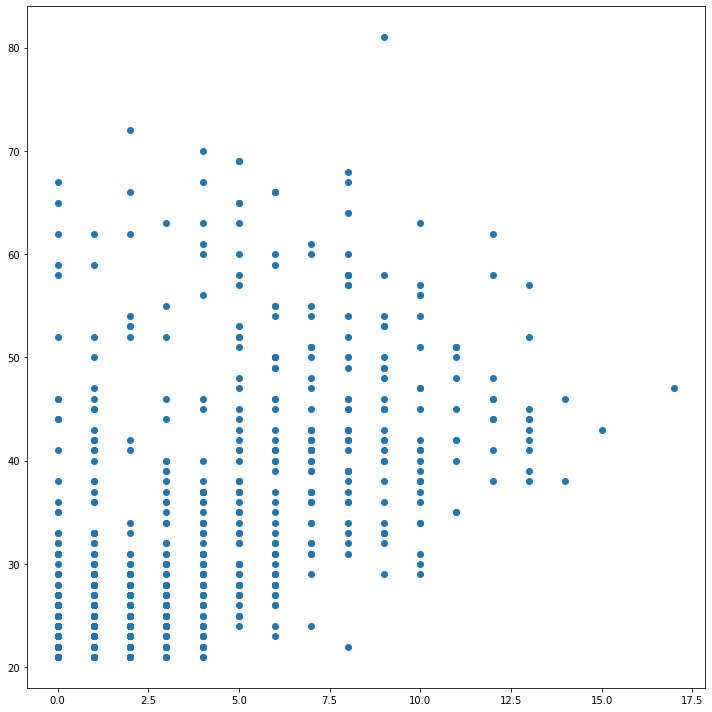

In [ ]:
plt.scatter(data['Pregnancies'],data['Age'])
plt.show()

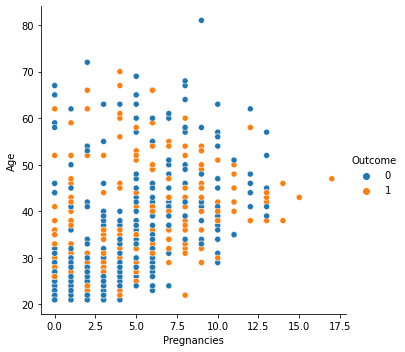

In [ ]:
#Relational plot
sns.relplot(x='Pregnancies',y='Age', hue='Outcome',data=data)

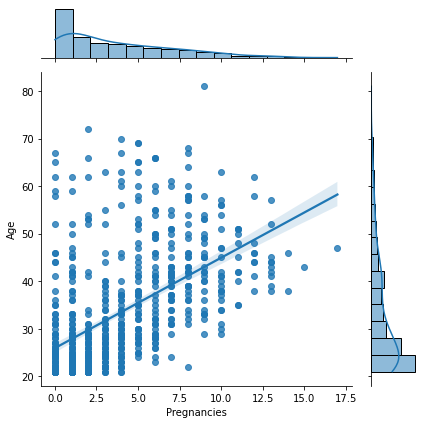

In [ ]:
sns.jointplot(x='Pregnancies', y='Age', data=data, kind="reg")

Key Takeaway: Berdasarkan heatmap juga plot di atas, jumlah kehamilan dan umur memiliki hubungan yang positif. Semakin besar jumlah kehamilan, maka umur juga semakin tua. In a sense ini masuk akal, namun tidak ada korelasi nyata terhadap jumlah kehamilan dan umur.

### Skin Thickness vs BMI

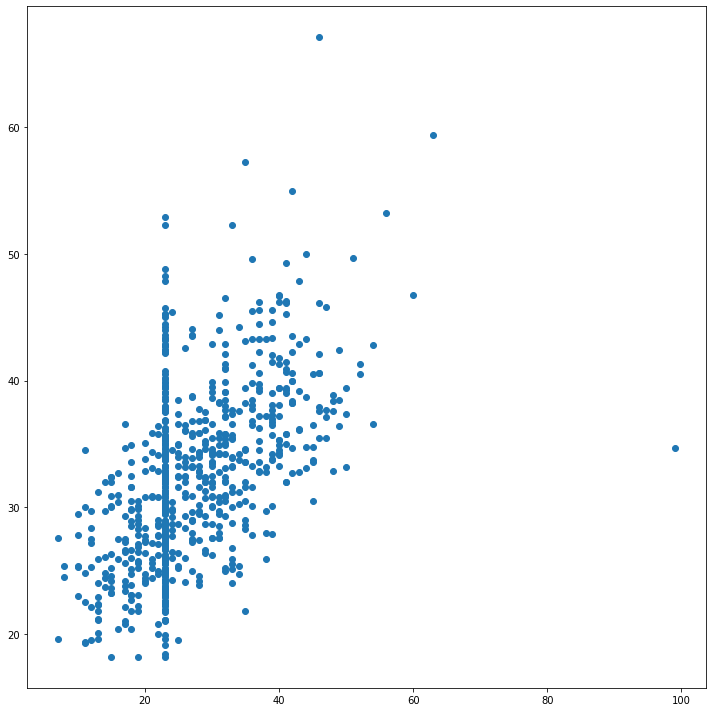

In [ ]:
plt.scatter(data['SkinThickness'],data['BMI'])
plt.show()

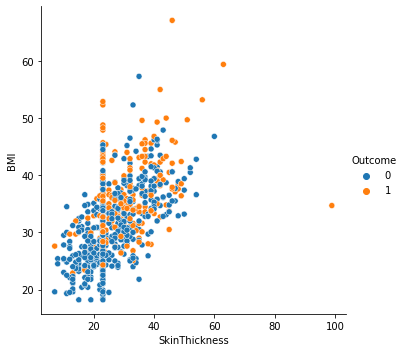

In [ ]:
#Relational plot
sns.relplot(x='SkinThickness',y='BMI', hue='Outcome',data=data)

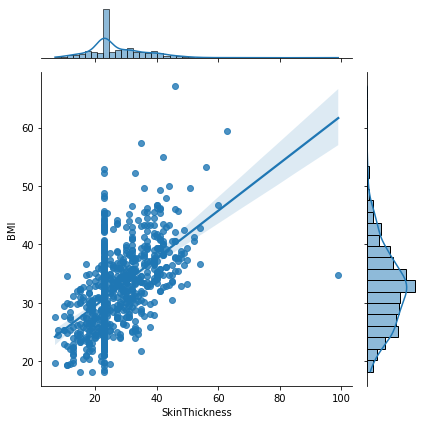

In [ ]:
sns.jointplot(x='SkinThickness', y='BMI', data=data, kind="reg")

Key Takeaway: Ketebalan Kulit memiliki hubungan yang positif dengan tingkat BMI. semakin tebal kulit, maka semakin tinggi pula BMInya

## Kesimpulan EDA 1
Dapat disimpulkan jika variabel yang tersedia berhubungan lemah satu antar satu dengan lainnya. Variabel yang berhubungan hanya Umur dengan Jumlah kehamilan dan Ketebalan kulit dengan BMI. Untuk Outcome sendiri, memiliki hubungan yang cukup dengan variabel Glucose.
#### 
Walaupun demikian, terdapat beberapa fitur yang seharusnya dapat digunakan untuk memprediksi seseorang terkena diabetes atau tidak. Fitur-fitur tersebut adalah:
- Glucose -> Gula Darah
- BloodPressure -> Tekanan Darah
- Skin Thickness -> Ketebalan Kulit
- Insulin
- BMI
- Diabetes_Chance -> Chance seseorang terkena diabetes berdasarkan histori keluarga

# 4. EDA 2 -> FEATURES VS OUTCOME

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_Chance,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,91.000000,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,107.812757,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,23.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_Chance,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.060448,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.351170,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.033234,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.240045,0.546951,0.142977,0.054514,0.189065
Insulin,-0.060448,0.351170,-0.033234,0.240045,1.000000,0.188268,0.180077,-0.022461,0.143914
BMI,0.021546,0.231400,0.281132,0.546951,0.188268,1.000000,0.153506,0.025744,0.312249
Diabetes_Chance,-0.033523,0.137327,-0.002378,0.142977,0.180077,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.022461,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.143914,0.312249,0.173844,0.238356,1.000000


## Pregnancies vs Outcome

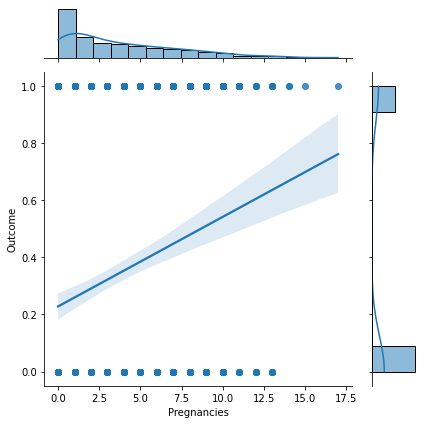

In [ ]:
sns.jointplot(x='Pregnancies', y='Outcome', data=data, kind="reg")

Key takeaway: Angka kehamilan memiliki hubungan yang positif dengan hasil tes (outcome) walaupun hubungannya lemah dengan koefisien 0.2

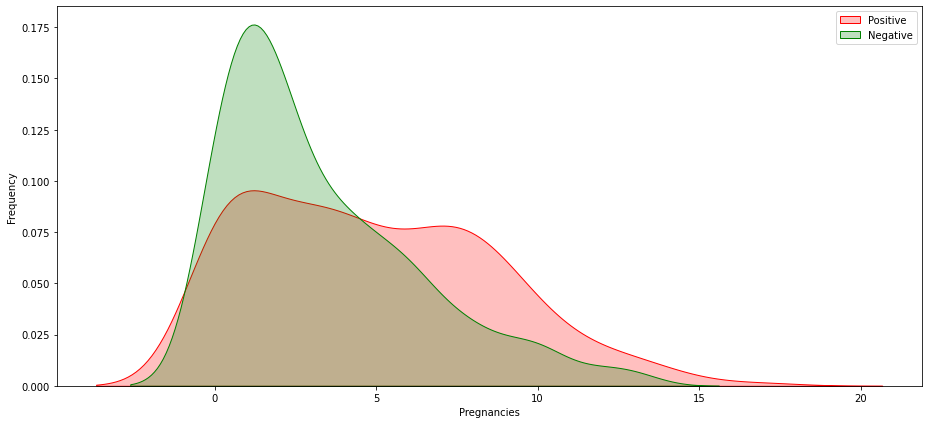

In [ ]:
#explore pregnancies vs outcome

plt.figure(figsize=(13,6))
g = sns.kdeplot(data['Pregnancies'][data['Outcome'] == 1], color='Red', shade=True)
g = sns.kdeplot(data['Pregnancies'][data['Outcome'] == 0], ax= g, color='Green', shade=True)
g.set_xlabel('Pregnancies')
g.set_ylabel('Frequency')
g.legend(['Positive', 'Negative'])

orang yang positif diabetes cenderung memiliki
riwayat kehamilan (jumlah kehamilan) yang cukup
tinggi (> 20 Kali). Pasien diabetes paling banyak
pada jumlah kehamilan 2 kali`

## Glucose vs Outcome

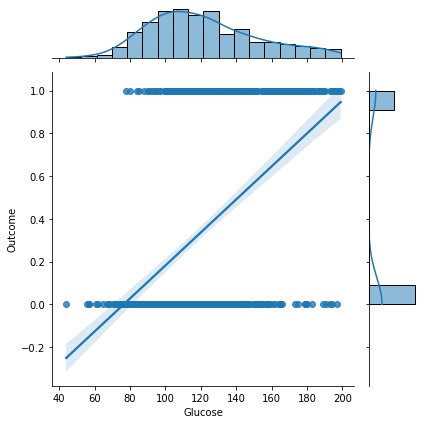

In [ ]:
sns.jointplot(x='Glucose', y='Outcome', data=data, kind="reg")

Key takeaway: Tingkat gula darah memiliki korelasi positif yang cukup kuat dengan hasil tes (outcome) dengan koefisien 0.48

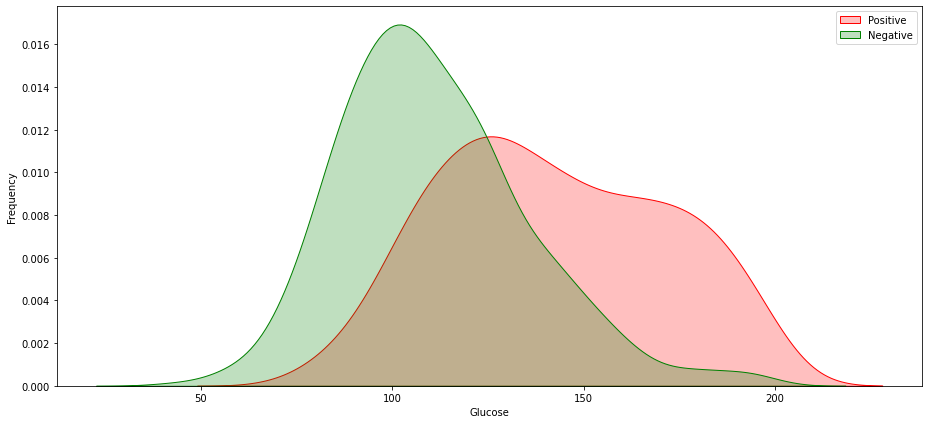

In [ ]:
#explore glucose vs outcome

plt.figure(figsize=(13,6))
g = sns.kdeplot(data['Glucose'][data['Outcome'] == 1], color='Red', shade=True)
g = sns.kdeplot(data['Glucose'][data['Outcome'] == 0], ax= g, color='Green', shade=True)
g.set_xlabel('Glucose')
g.set_ylabel('Frequency')
g.legend(['Positive', 'Negative'])

orang yang terkena diabetes memiliki nilai glucose yang
lebih tinggi daripada orang-orang yang non-diabetes.
Penderita diabetes paling banyak pada nilai glucose > 125

## Blood Pressure vs Outcome

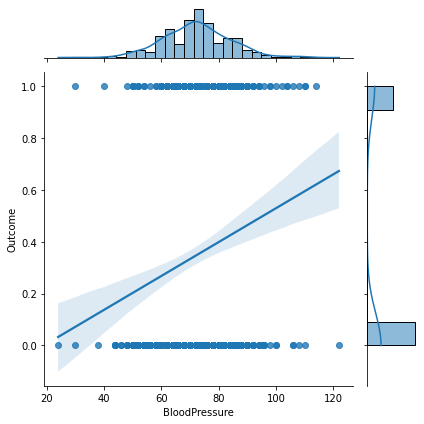

In [ ]:
sns.jointplot(x='BloodPressure', y='Outcome', data=data, kind="reg")

Key takeaway: Tekanan darah memiliki korelasi positif dengan hasil tes (outcome) walaupun hubungannya lemah dengan koefisien 0.16

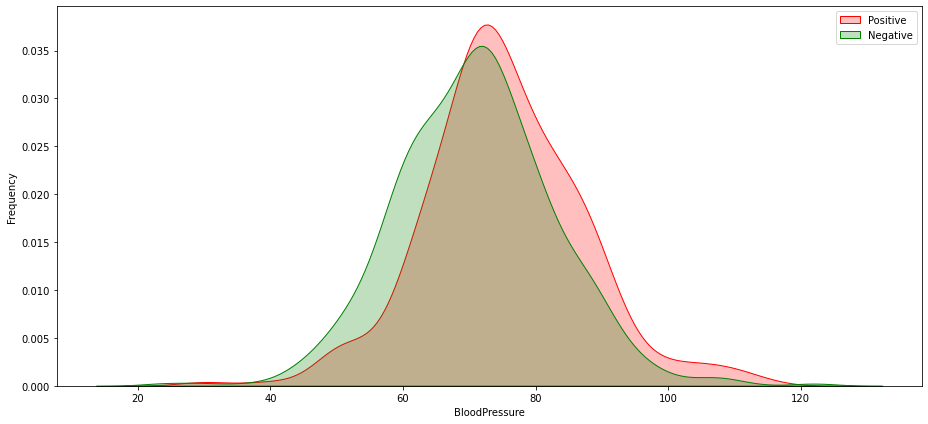

In [ ]:
#explore bloodpressure vs outcome

plt.figure(figsize=(13,6))
g = sns.kdeplot(data['BloodPressure'][data['Outcome'] == 1], color='Red', shade=True)
g = sns.kdeplot(data['BloodPressure'][data['Outcome'] == 0], ax= g, color='Green', shade=True)
g.set_xlabel('BloodPressure')
g.set_ylabel('Frequency')
g.legend(['Positive', 'Negative'])

orang yang terkena diabetes memiliki nilai bloodPressure
yang lebih tinggi daripada orang-orang yang nondiabetes.
Terbanyak diderita oleh pasien dengan
bloodPressure >75an.

## Skin Thickness vs Outcome

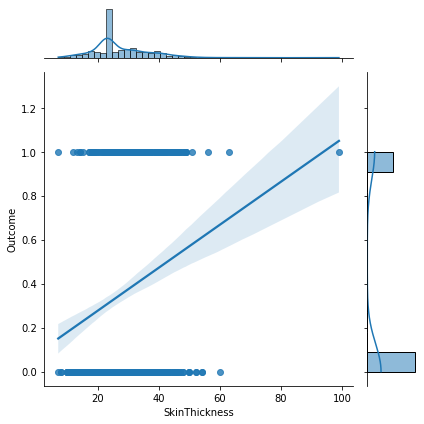

In [ ]:
sns.jointplot(x='SkinThickness', y='Outcome', data=data, kind="reg")

Key takeaway: Ketebalan kulit memiliki korelasi positif dengan hasil tes (outcome) walaupun hubungannya lemah dengan koefisien 0.17

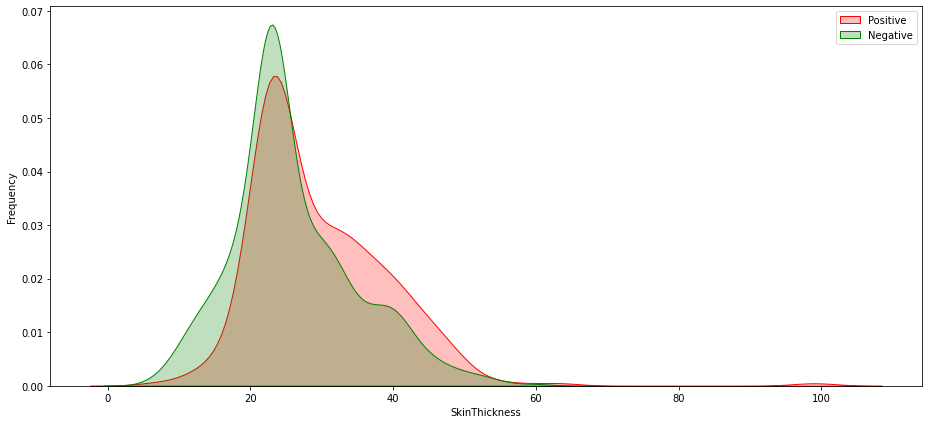

In [ ]:
#explore skinthickness vs outcome

plt.figure(figsize=(13,6))
g = sns.kdeplot(data['SkinThickness'][data['Outcome'] == 1], color='Red', shade=True)
g = sns.kdeplot(data['SkinThickness'][data['Outcome'] == 0], ax= g, color='Green', shade=True)
g.set_xlabel('SkinThickness')
g.set_ylabel('Frequency')
g.legend(['Positive', 'Negative'])

orang yang positif diabetes cenderung memiliki ketebalan
kulit (skinthickness) yang cukup tinggi (hingga nilai 50) .
Range skinThickness diabetes 25-40an dan paling banyak
dititik 25an.

## Insulin vs Outcome

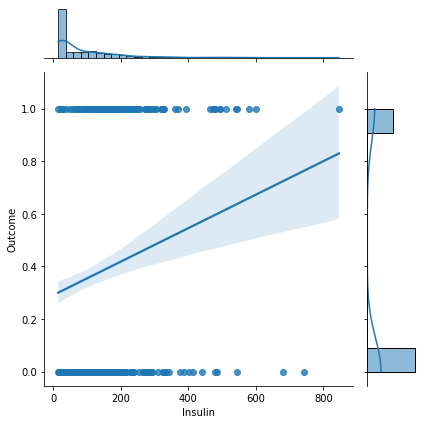

In [ ]:
sns.jointplot(x='Insulin', y='Outcome', data=data, kind="reg")

Key takeaway: Injeksi insulin memiliki korelasi positif dengan hasil tes (outcome) walaupun hubungannya lemah dengan koefisien 0.15

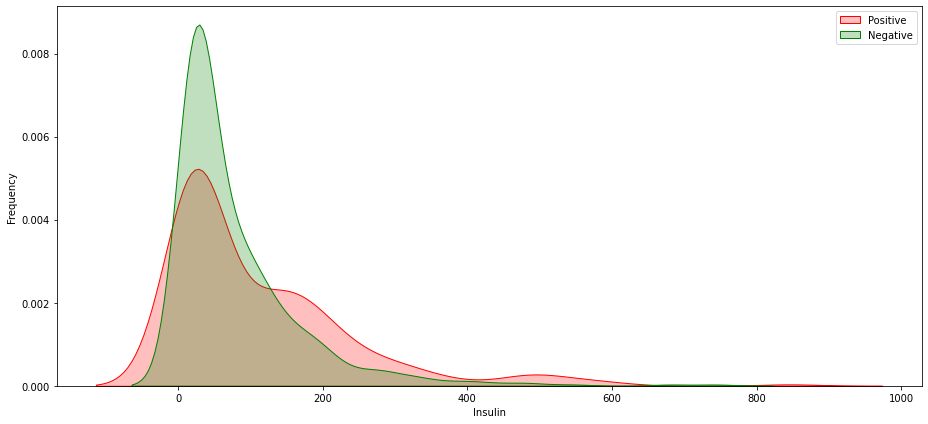

In [ ]:
#explore Insulin vs outcome

plt.figure(figsize=(13,6))
g = sns.kdeplot(data['Insulin'][data['Outcome'] == 1], color='Red', shade=True)
g = sns.kdeplot(data['Insulin'][data['Outcome'] == 0], ax= g, color='Green', shade=True)
g.set_xlabel('Insulin')
g.set_ylabel('Frequency')
g.legend(['Positive', 'Negative'])

orang yang terkena diabetes memiliki insulin berada pada
range 0-600an dan paling banyak diderita oleh orang
dengan range insulin 0-170an.

## BMI vs Outcome

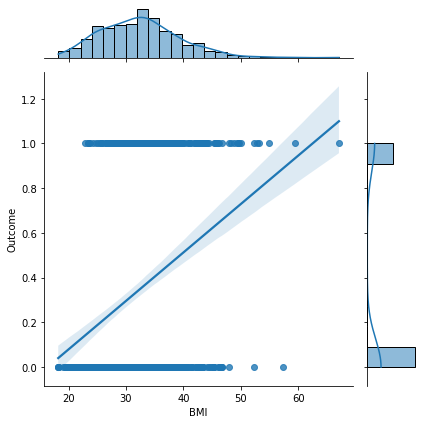

In [ ]:
sns.jointplot(x='BMI', y='Outcome', data=data, kind="reg")

Key takeaway: Body Mass Index (BMI) memiliki korelasi positif dengan hasil tes (outcome) walaupun hubungannya lemah dengan koefisien 0.29

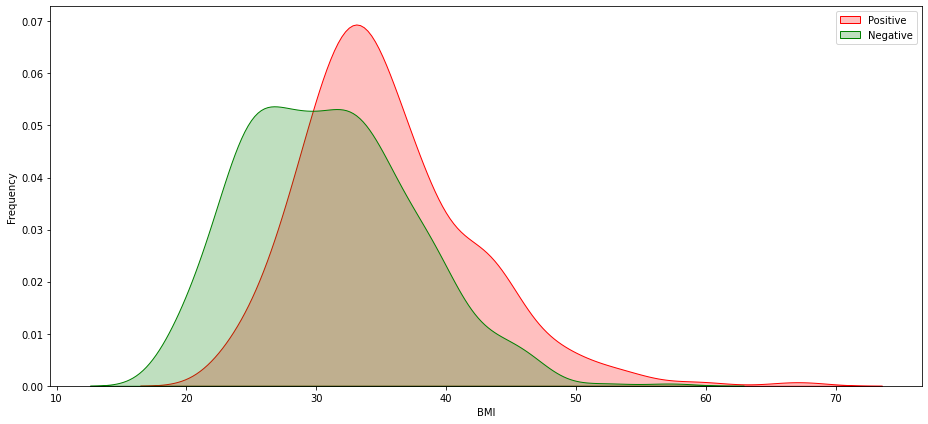

In [ ]:
#explore bmi vs outcome

plt.figure(figsize=(13,6))
g = sns.kdeplot(data['BMI'][data['Outcome'] == 1], color='Red', shade=True)
g = sns.kdeplot(data['BMI'][data['Outcome'] == 0], ax= g, color='Green', shade=True)
g.set_xlabel('BMI')
g.set_ylabel('Frequency')
g.legend(['Positive', 'Negative'])

orang yang terkena diabetes memiliki nilai BMI pada range
20-70 an dan paling banyak diderita oleh pasien dengan BMI
pada range 30-40 artinya sudah masuk kategori
overweight/obese

## Diabetes Chance vs Outcome

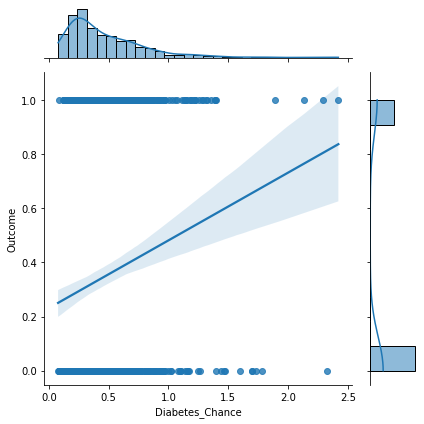

In [ ]:
sns.jointplot(x='Diabetes_Chance', y='Outcome', data=data, kind="reg")

Key takeaway: Riwayat histori diabetes keluarga memiliki korelasi positif dengan hasil tes (outcome) walaupun hubungannya lemah dengan koefisien 0.18

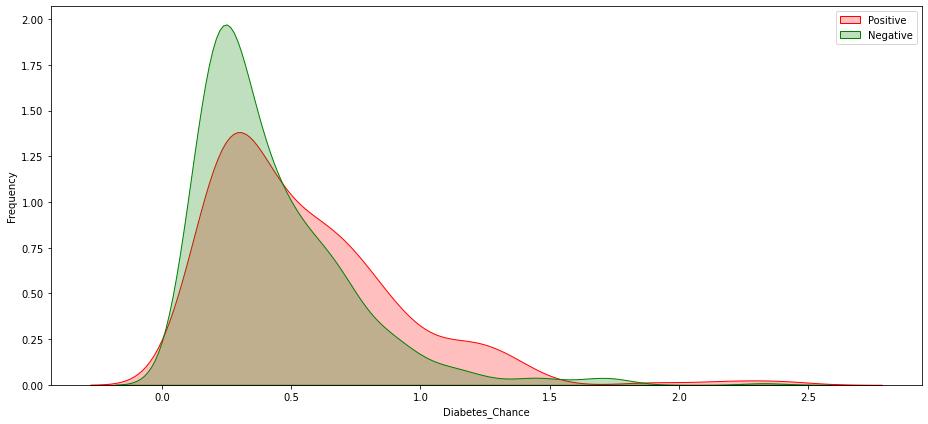

In [ ]:
#explore diabetesChance vs outcome

plt.figure(figsize=(13,6))
g = sns.kdeplot(data['Diabetes_Chance'][data['Outcome'] == 1], color='Red', shade=True)
g = sns.kdeplot(data['Diabetes_Chance'][data['Outcome'] == 0], ax= g, color='Green', shade=True)
g.set_xlabel('Diabetes_Chance')
g.set_ylabel('Frequency')
g.legend(['Positive', 'Negative'])

orang yang positif diabetes memiliki nilai diabetesChance
pada kisaran 0-2.5. Paling banyak diderita oleh pasien
dengan nilai DiabetesChance pada range 0-0.5. Semakin
tinggi nilai diabetesChance maka semakin besar peluang
orang tersebut positif diabetes.

## Age vs Outcome

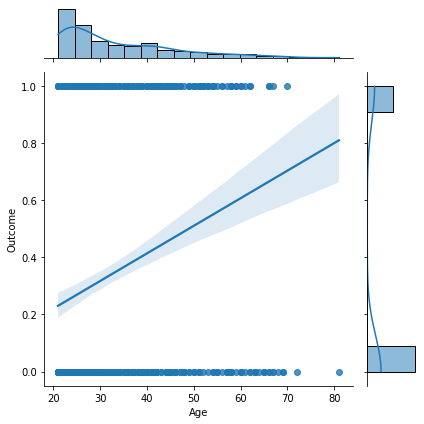

In [ ]:
sns.jointplot(x='Age', y='Outcome', data=data, kind="reg")

Key takeaway: Umur memiliki korelasi positif dengan hasil tes (outcome) walaupun hubungannya lemah dengan koefisien 0.23

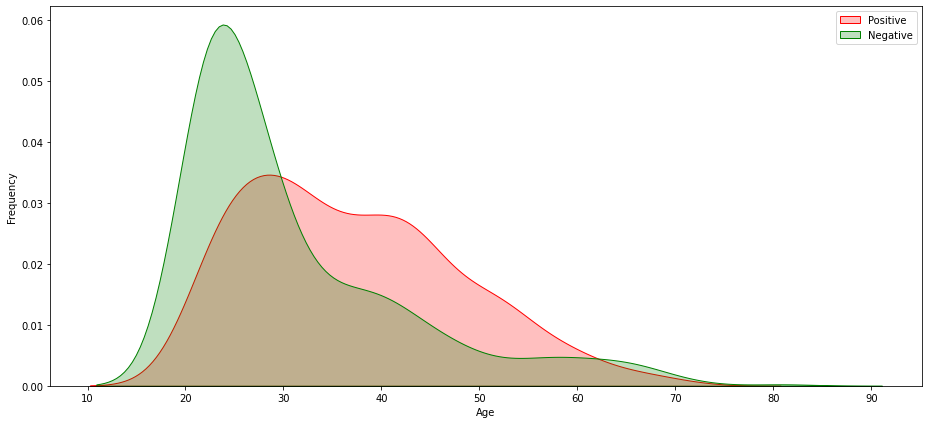

In [ ]:
#explore age vs outcome

plt.figure(figsize=(13,6))
g = sns.kdeplot(data['Age'][data['Outcome'] == 1], color='Red', shade=True)
g = sns.kdeplot(data['Age'][data['Outcome'] == 0], ax= g, color='Green', shade=True)
g.set_xlabel('Age')
g.set_ylabel('Frequency')
g.legend(['Positive', 'Negative'])

orang yang terkena diabetes terbanyak berada pada
rentang usia 20-50 tahun.

# 5. Feature Engineering
Adding some features and after that we will do a second wave of EDA

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_Chance,Age,Outcome
0,6,148.0,72.0,35.0,23.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,23.0,26.6,0.351,31,0
2,8,183.0,64.0,23.0,23.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
#Features adding function
def bmi_status(row):
    if row['BMI']<18.5:
        return 'underweight'
    elif row ['BMI'] == 18.5 and row['BMI'] <25:
        return 'healthy'
    elif row['BMI'] == 25 and row['BMI']<30:
        return 'overweight'
    else:
        return 'obese'

def blood_press(row):
    if row['BloodPressure'] <90:
        return 'Low'
    elif row['BloodPressure'] == 90 and row['BloodPressure'] <120:
        return 'Normal'
    elif row['BloodPressure'] == 120 and row['BloodPressure'] <130:
        return 'Elevated'
    elif row['BloodPressure'] == 130 and row['BloodPressure'] <140:
        return 'High Stage 1'
    elif row['BloodPressure'] == 140 and row['BloodPressure'] <180:
        return 'High Stage 2'
    else:
        return 'Hypertensive'
    
def glucose_level(row):
    if row['Glucose'] == 70 and row['Glucose'] < 100:
        return 'Normal'
    elif row['Glucose'] == 100 and row['Glucose'] <126:
        return 'Symptomatic'
    elif row['Glucose'] <70:
        return 'Hypoglicemic'
    elif row['Glucose'] == 126 and row['Glucose']<=180:
        return 'Diabetic'
    else:
        return 'Hyperglycemic'

def test_result(row):
    if row['Outcome']==1:
        return 'Positive'
    else:
        return 'Negative'
    
def is_obese(row):
    if row['BMI']>=30:
        return 'Yes'
    else:
        return 'No'

def is_diabetic(row): #ini kayanya gaperlu, udah ada outcome soalnya
    if row['Outcome']==1:
        return 'Yes'
    else:
        return 'No'
    
data['BMI_status']=data.apply(bmi_status,axis=1)
data['Pressure_status']=data.apply(blood_press, axis=1)
data['Diabetes_status']=data.apply(glucose_level, axis=1)
data['test_result']=data.apply(test_result, axis=1)
data['is_obese']=data.apply(is_obese,axis=1)
data['is_diabetic']=data.apply(is_diabetic,axis=1)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_Chance,Age,Outcome,BMI_status,Pressure_status,Diabetes_status,test_result,is_obese,is_diabetic
0,6,148.0,72.0,35.0,23.0,33.6,0.627,50,1,obese,Low,Hyperglycemic,Positive,Yes,Yes
1,1,85.0,66.0,29.0,23.0,26.6,0.351,31,0,obese,Low,Hyperglycemic,Negative,No,No
2,8,183.0,64.0,23.0,23.0,23.3,0.672,32,1,obese,Low,Hyperglycemic,Positive,No,Yes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,obese,Low,Hyperglycemic,Negative,No,No
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,obese,Low,Hyperglycemic,Positive,Yes,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pregnancies      768 non-null    int64  
 1   Glucose          768 non-null    float64
 2   BloodPressure    768 non-null    float64
 3   SkinThickness    768 non-null    float64
 4   Insulin          768 non-null    float64
 5   BMI              768 non-null    float64
 6   Diabetes_Chance  768 non-null    float64
 7   Age              768 non-null    int64  
 8   Outcome          768 non-null    int64  
 9   BMI_status       768 non-null    object 
 10  Pressure_status  768 non-null    object 
 11  Diabetes_status  768 non-null    object 
 12  test_result      768 non-null    object 
 13  is_obese         768 non-null    object 
 14  is_diabetic      768 non-null    object 
dtypes: float64(6), int64(3), object(6)
memory usage: 90.1+ KB


In [ ]:
print(data['BMI_status'].unique(), '<- Unique BMI category')

['obese' 'overweight' 'underweight'] <- Unique BMI category


In [ ]:
print(data['Pressure_status'].unique(),'<- Unique Blood Pressure status')

['Low' 'Hypertensive' 'Normal'] <- Unique Blood Pressure status


In [ ]:
print(data['Diabetes_status'].unique(),'<- Unique Diabetes Category')

['Hyperglycemic' 'Symptomatic' 'Diabetic' 'Hypoglicemic'] <- Unique Diabetes Category


Key Takeaway: Terdapat empat buah fitur kategorical yang ditambahkan:
- test_result -> Hasil tes diabetes
    - Positive
    - Negative
- BMI_status -> Kategori BMI 
    - Underweight
    - Obese
    - Overweight
- Pressure_status -> Kategori tekanan darah
    - Low
    - Normal
    - Hypertensive
- Diabetes_status -> Kategori tingkat gula darah
    - Diabetic
    - Hypoglicemic
    - Symptomatic
    - Hyperglycemic

# 6. Categorical EDA -> Categorical Insight

## Outcome
- 0 = not diabetic/Negative
- 1 = tested as diabetic/Positive

In [ ]:
outcome = data.groupby('test_result')[['Outcome']].count().reset_index()
outcome

,test_result,Outcome
0,Negative,500
1,Positive,268


In [ ]:
fig = px.bar(outcome, x='test_result', y= 'Outcome', color='test_result', )
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

Key Takeaway: Dari data yang ada, dapat disimpulkan jika 500
orang negatif diabetes dan 268 orang lainnya
positif diabetes.

## Diabetes_Status

In [ ]:
Diabetic = data.groupby('Diabetes_status')[['Outcome']].count().reset_index()
Diabetic

,Diabetes_status,Outcome
0,Diabetic,9
1,Hyperglycemic,731
2,Hypoglicemic,11
3,Symptomatic,17


In [ ]:
fig = px.bar(Diabetic, x='Diabetes_status', y= 'Outcome', color='Diabetes_status', )
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Key Takeaway:Dari data yang diberikan, jumlah orang yang tergolong Diabetic (gula darah tinggi) adalah 9 orang, orang yang symptomatic (memiliki tingkat gula darah lebih tinggi dari normal) berjumlah 17 orang, dan 11 orang terindikasi Hypoglicemic (Gula darah di bawah normal). 731 Orang lainnya terindikasi Hyperglycemic (gula darah ekstrim).

## BMI Status

In [ ]:
bmi = data.groupby('BMI_status')[['Outcome']].count().reset_index()
bmi

,BMI_status,Outcome
0,obese,758
1,overweight,6
2,underweight,4


In [ ]:
fig = px.bar(bmi, x='BMI_status', y= 'Outcome', color='BMI_status', )
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Key Takeaway: Dari data yang diberikan, sangat didominasi oleh orang
yang obesitas yakni 758 orang. Sangat tidak imbang
terhadap status overweight (6 orang) dan underweight
(4 orang)

## Blood Pressure Level

In [ ]:
pressure = data.groupby('Pressure_status')[['Outcome']].count().reset_index()
pressure

,Pressure_status,Outcome
0,Hypertensive,38
1,Low,708
2,Normal,22


In [ ]:
fig = px.bar(pressure, x='Pressure_status', y= 'Outcome', color='Pressure_status', )
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Key Takeaway: Melalui data yang diberikan, mayoritas adalah mereka
yang memiliki tekanan darah rendah sebanyak 708
orang. Ada 38 orang yang terindikasi hipertensi dan 22
orang yang memiliki tekanan darah normal.

# 8. Feature Scalling

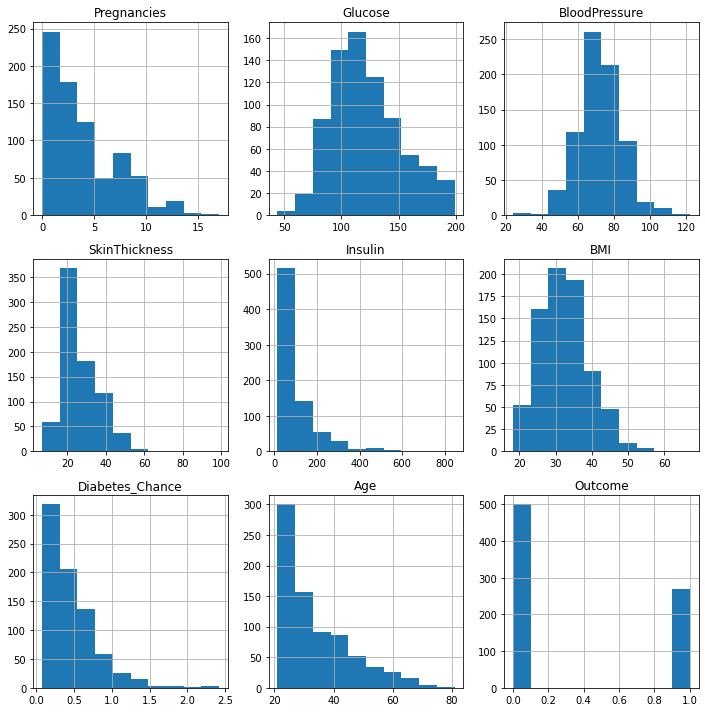

In [ ]:
data.hist()
plt.show()

In [ ]:
#Importing MinMaxScaler to do scalling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
#Compare feature scaling methods

scaled_compare = data.copy()

#standard scaler
ss = StandardScaler()
scaled_compare['Glucose_standard_scaler']= ss.fit_transform(scaled_compare[['Glucose']])
scaled_compare['Diabeteschance_standard_scaler']= ss.fit_transform(scaled_compare[['Diabetes_Chance']])

#robust scaler
rs = RobustScaler()
scaled_compare['Glucose_robust_scaler']= rs.fit_transform(scaled_compare[['Glucose']])
scaled_compare['Diabeteschance_robust_scaler']= rs.fit_transform(scaled_compare[['Diabetes_Chance']])

#minmax scaler
mms = MinMaxScaler()
scaled_compare['Glucose_minmax_scaler']= mms.fit_transform(scaled_compare[['Glucose']])
scaled_compare['Diabeteschance_minmax_scaler']= mms.fit_transform(scaled_compare[['Diabetes_Chance']])


scaled_compare.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_Chance,Age,Outcome,BMI_status,...,Diabetes_status,test_result,is_obese,is_diabetic,Glucose_standard_scaler,Diabeteschance_standard_scaler,Glucose_robust_scaler,Diabeteschance_robust_scaler,Glucose_minmax_scaler,Diabeteschance_minmax_scaler
0,6,148.0,72.0,35.0,23.0,33.6,0.627,50,1,obese,...,Hyperglycemic,Positive,Yes,Yes,0.866045,0.468492,0.765432,0.665359,0.670968,0.234415
1,1,85.0,66.0,29.0,23.0,26.6,0.351,31,0,obese,...,Hyperglycemic,Negative,No,No,-1.205066,-0.365061,-0.790123,-0.056209,0.264516,0.116567
2,8,183.0,64.0,23.0,23.0,23.3,0.672,32,1,obese,...,Hyperglycemic,Positive,No,Yes,2.016662,0.604397,1.629630,0.783007,0.896774,0.253629
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,obese,...,Hyperglycemic,Negative,No,No,-1.073567,-0.920763,-0.691358,-0.537255,0.290323,0.038002
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,obese,...,Hyperglycemic,Positive,Yes,Yes,0.504422,5.484909,0.493827,5.007843,0.600000,0.943638


In [ ]:
# #Defining the scaler
minscaler = MinMaxScaler()
robust = RobustScaler()
scaler = StandardScaler() 


In [ ]:
#Dropping categorical features
data_scaled = data.drop(columns=['BMI_status','Pressure_status','Diabetes_status','test_result'],axis=1)

In [ ]:
#after dropping
data_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_Chance,Age,Outcome,is_obese,is_diabetic
0,6,148.0,72.0,35.0,23.0,33.6,0.627,50,1,Yes,Yes
1,1,85.0,66.0,29.0,23.0,26.6,0.351,31,0,No,No
2,8,183.0,64.0,23.0,23.0,23.3,0.672,32,1,No,Yes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,No,No
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Yes,Yes


In [ ]:
#Scalling all the numerical features

data_scaled['preg_scaled'] = robust.fit_transform(data_scaled[['Pregnancies']])
data_scaled['chance_scaled'] = robust.fit_transform(data_scaled[['Diabetes_Chance']])
data_scaled['age_scaled'] = robust.fit_transform(data_scaled[['Age']])
data_scaled['skin_scaled'] = robust.fit_transform(data_scaled[['SkinThickness']])
data_scaled['insulin_scaled'] = robust.fit_transform(data_scaled[['Insulin']])
data_scaled['glucose_scaled'] = robust.fit_transform(data_scaled[['Glucose']])
data_scaled['blood_scaled'] = robust.fit_transform(data_scaled[['BloodPressure']])
data_scaled['bmi_scaled'] = robust.fit_transform(data_scaled[['BMI']])


In [ ]:
#dropping the features after scalling
data_scaled.drop(columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Diabetes_Chance',
                         'Age','Outcome'],axis=1,inplace=True)

In [ ]:
#just moving the target to the back
data_scaled['Outcome']=data['Outcome']

In [ ]:
data_scaled.head()

,is_obese,is_diabetic,preg_scaled,chance_scaled,age_scaled,skin_scaled,insulin_scaled,glucose_scaled,blood_scaled,bmi_scaled,Outcome
0,Yes,Yes,0.6,0.665359,1.235294,1.333333,-0.071942,0.765432,0.000,0.175824,1
1,No,No,-0.4,-0.056209,0.117647,0.666667,-0.071942,-0.790123,-0.375,-0.593407,0
2,No,Yes,1.0,0.783007,0.176471,0.000000,-0.071942,1.629630,-0.500,-0.956044,1
3,No,No,-0.4,-0.537255,-0.470588,0.000000,0.609113,-0.691358,-0.375,-0.428571,0
4,Yes,Yes,-0.6,5.007843,0.235294,1.333333,1.318945,0.493827,-2.000,1.219780,1


It is neat, but we need to transform the is_obese and is_diabetic feature into numerical variable using OneHotEncoder because they are nominal data type

In [ ]:
#Importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Defining the encoder
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
col = sorted(data['is_obese'].unique().tolist()) + sorted(data['is_diabetic'].unique().tolist())

In [ ]:
#Encoding the features
enc_df = pd.DataFrame(enc.fit_transform(data_scaled[['is_obese', 'is_diabetic']]).toarray(), columns=col)

In [ ]:
enc_df.head()

,No,Yes,No,Yes
0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0


In [ ]:
#Joining the scaled dataframe with encoded dataframe
data_scaled = data_scaled.join(enc_df)
data_scaled.head()

,is_obese,is_diabetic,preg_scaled,chance_scaled,age_scaled,skin_scaled,insulin_scaled,glucose_scaled,blood_scaled,bmi_scaled,Outcome,No,Yes,No,Yes
0,Yes,Yes,0.6,0.665359,1.235294,1.333333,-0.071942,0.765432,0.000,0.175824,1,0.0,1.0,0.0,1.0
1,No,No,-0.4,-0.056209,0.117647,0.666667,-0.071942,-0.790123,-0.375,-0.593407,0,1.0,0.0,1.0,0.0
2,No,Yes,1.0,0.783007,0.176471,0.000000,-0.071942,1.629630,-0.500,-0.956044,1,1.0,0.0,0.0,1.0
3,No,No,-0.4,-0.537255,-0.470588,0.000000,0.609113,-0.691358,-0.375,-0.428571,0,1.0,0.0,1.0,0.0
4,Yes,Yes,-0.6,5.007843,0.235294,1.333333,1.318945,0.493827,-2.000,1.219780,1,0.0,1.0,0.0,1.0


In [ ]:
#creating dummies
index_data = pd.get_dummies(data_scaled[['is_obese', 'is_diabetic']], drop_first=True)

In [ ]:
index_data.head()

,is_obese_Yes,is_diabetic_Yes
0,1,1
1,0,0
2,0,1
3,0,0
4,1,1


In [ ]:
# joining dummies to the dataframe
final_data=data_scaled.join(index_data)
final_data.head()

,is_obese,is_diabetic,preg_scaled,chance_scaled,age_scaled,skin_scaled,insulin_scaled,glucose_scaled,blood_scaled,bmi_scaled,Outcome,No,Yes,No,Yes,is_obese_Yes,is_diabetic_Yes
0,Yes,Yes,0.6,0.665359,1.235294,1.333333,-0.071942,0.765432,0.000,0.175824,1,0.0,1.0,0.0,1.0,1,1
1,No,No,-0.4,-0.056209,0.117647,0.666667,-0.071942,-0.790123,-0.375,-0.593407,0,1.0,0.0,1.0,0.0,0,0
2,No,Yes,1.0,0.783007,0.176471,0.000000,-0.071942,1.629630,-0.500,-0.956044,1,1.0,0.0,0.0,1.0,0,1
3,No,No,-0.4,-0.537255,-0.470588,0.000000,0.609113,-0.691358,-0.375,-0.428571,0,1.0,0.0,1.0,0.0,0,0
4,Yes,Yes,-0.6,5.007843,0.235294,1.333333,1.318945,0.493827,-2.000,1.219780,1,0.0,1.0,0.0,1.0,1,1


In [ ]:
#dropping unused features
final_data.drop(columns=['is_obese','is_diabetic','No','Yes'],axis=1,inplace=True)

In [ ]:
final_data.head()

,preg_scaled,chance_scaled,age_scaled,skin_scaled,insulin_scaled,glucose_scaled,blood_scaled,bmi_scaled,Outcome,is_obese_Yes,is_diabetic_Yes
0,0.6,0.665359,1.235294,1.333333,-0.071942,0.765432,0.000,0.175824,1,1,1
1,-0.4,-0.056209,0.117647,0.666667,-0.071942,-0.790123,-0.375,-0.593407,0,0,0
2,1.0,0.783007,0.176471,0.000000,-0.071942,1.629630,-0.500,-0.956044,1,0,1
3,-0.4,-0.537255,-0.470588,0.000000,0.609113,-0.691358,-0.375,-0.428571,0,0,0
4,-0.6,5.007843,0.235294,1.333333,1.318945,0.493827,-2.000,1.219780,1,1,1


# 8. Balancing Data
Balancing data akan menggunakan teknik oversampling agar tidak ada data yang terbuang. Metode yang digunakan adalah SMOTE agar variasi dari data juga bertambah

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

In [ ]:
#separating independent from dependent variables
X = final_data[['glucose_scaled','insulin_scaled','bmi_scaled','chance_scaled','age_scaled','is_obese_Yes']] 
y = final_data['Outcome']

In [ ]:
X.head()

,glucose_scaled,insulin_scaled,bmi_scaled,chance_scaled,age_scaled,is_obese_Yes
0,0.765432,-0.071942,0.175824,0.665359,1.235294,1
1,-0.790123,-0.071942,-0.593407,-0.056209,0.117647,0
2,1.629630,-0.071942,-0.956044,0.783007,0.176471,0
3,-0.691358,0.609113,-0.428571,-0.537255,-0.470588,0
4,0.493827,1.318945,1.219780,5.007843,0.235294,1


In [ ]:
#split train-test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(614, 6)

In [ ]:
y_train.shape

(614,)

In [ ]:
y_train.value_counts()

0    393
1    221
Name: Outcome, dtype: int64

In [ ]:

print('Before Oversampling: ',Counter(y_train))
#defining smote
SMOTE = SMOTE(random_state=0)

#fit and apply the transform
X_train_smote, y_train_smote = SMOTE.fit_resample(X_train,y_train)

#summarize class distribution
print('After Oversampling: ',Counter(y_train_smote))

Before Oversampling:  Counter({0: 393, 1: 221})
After Oversampling:  Counter({1: 393, 0: 393})


# 9. Machine Learning Modeling
We don't use regression, kita pakai classification model

In [ ]:
# Importing packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

## Decision Tree

In [ ]:
# Decision Tree without resampling
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# Decision Tree with resampling
dt2 = DecisionTreeClassifier(random_state=0)
dt2.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=0)

## KNN

In [ ]:
# KNN without resampling
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# KNN with resampling
knn2 = KNeighborsClassifier()
knn2.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

## SVC Linear

In [ ]:
from sklearn.svm import SVC

In [ ]:
# SVCL without resampling
svc = SVC(kernel='linear',random_state=0)
svc.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
# SVCL with resampling
svc2 = SVC(kernel='linear',random_state=0)
svc2.fit(X_train_smote,y_train_smote)

SVC(kernel='linear', random_state=0)

## SVC RBF

In [ ]:
# SVCR without resampling
svc3 = SVC(kernel='rbf',random_state=0)
svc3.fit(X_train,y_train)

SVC(random_state=0)

In [ ]:
# SVCR with resampling
svc4 = SVC(kernel='rbf',random_state=0)
svc4.fit(X_train_smote,y_train_smote)

SVC(random_state=0)

## RANDOM FOREST

In [ ]:
# Random Forest without resampling
rf1 = RandomForestClassifier(random_state=0)
rf1.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Random Forest with resampling
rf2 = RandomForestClassifier(random_state=0)
rf2.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=0)

## Naive Bayes

In [ ]:
# Naive Bayes without resampling
nb1 = GaussianNB()
nb1.fit(X_train,y_train)

GaussianNB()

In [ ]:
# Naive Bayes with resampling
nb2 = GaussianNB()
nb2.fit(X_train_smote,y_train_smote)

GaussianNB()

## Logistic Regression

In [ ]:
# Naive Bayes without resampling
lr1 = LogisticRegression()
lr1.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Naive Bayes with resampling
lr2 = LogisticRegression()
lr2.fit(X_train_smote,y_train_smote)

LogisticRegression()

# EVALUATION

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, silhouette_score
from sklearn.metrics import classification_report

## Decision Tree Classifier

### DT no Resampling

In [ ]:
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

pred = (acc*100, prec*100, recall*100)
pred

(72.72727272727273, 55.10204081632652, 57.446808510638306)

In [ ]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       107
           1       0.55      0.57      0.56        47

    accuracy                           0.73       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.73      0.73      0.73       154



### DT with Resampling

In [ ]:
y_pred_smote = dt2.predict(X_test)
acc = accuracy_score(y_test, y_pred_smote)
prec = precision_score(y_test, y_pred_smote)
recall = recall_score(y_test, y_pred_smote)

pred = (acc*100, prec*100, recall*100)
pred

(72.72727272727273, 54.23728813559322, 68.08510638297872)

In [ ]:
y_pred_dt2 = dt2.predict(X_test)
print(classification_report(y_test, y_pred_dt2))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       107
           1       0.54      0.68      0.60        47

    accuracy                           0.73       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.75      0.73      0.73       154



## KNN

### KNN No Resampling

In [ ]:
y_pred_knn = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)

pred = (acc*100, prec*100, recall*100)
pred

(77.27272727272727, 63.04347826086957, 61.702127659574465)

In [ ]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       107
           1       0.63      0.62      0.62        47

    accuracy                           0.77       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.77      0.77      0.77       154



### KNN With Resampling

In [ ]:
y_pred_knn2 = knn2.predict(X_test)
acc = accuracy_score(y_test, y_pred_knn2)
prec = precision_score(y_test, y_pred_knn2)
recall = recall_score(y_test, y_pred_knn2)

pred = (acc*100, prec*100, recall*100)
pred

(72.72727272727273, 53.42465753424658, 82.97872340425532)

In [ ]:
y_pred_knn2 = knn2.predict(X_test)
print(classification_report(y_test, y_pred_knn2))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78       107
           1       0.53      0.83      0.65        47

    accuracy                           0.73       154
   macro avg       0.72      0.76      0.71       154
weighted avg       0.79      0.73      0.74       154



## SVC Linear

### SVCL No Resampling

In [ ]:
y_pred_svc = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)

pred = (acc*100, prec*100, recall*100)
pred

(83.11688311688312, 76.92307692307693, 63.829787234042556)

In [ ]:
y_pred_svc = svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       107
           1       0.77      0.64      0.70        47

    accuracy                           0.83       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.83      0.83      0.83       154



### SVCL With Resampling

In [ ]:
y_pred_svc2 = svc2.predict(X_test)
acc = accuracy_score(y_test, y_pred_svc2)
prec = precision_score(y_test, y_pred_svc2)
recall = recall_score(y_test, y_pred_svc2)

pred = (acc*100, prec*100, recall*100)
pred

(74.67532467532467, 57.14285714285714, 68.08510638297872)

In [ ]:
y_pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, y_pred_svc2))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       107
           1       0.57      0.68      0.62        47

    accuracy                           0.75       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.76      0.75      0.75       154



## SVC RBF

### SVCR No Resampling

In [ ]:
y_pred_svc3 = svc3.predict(X_test)
acc = accuracy_score(y_test, y_pred_svc3)
prec = precision_score(y_test, y_pred_svc3)
recall = recall_score(y_test, y_pred_svc3)

pred = (acc*100, prec*100, recall*100)
pred

(79.87012987012987, 71.05263157894737, 57.446808510638306)

In [ ]:
y_pred_svc3 = svc3.predict(X_test)
print(classification_report(y_test, y_pred_svc3))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.71      0.57      0.64        47

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154



### SVCR With Resampling

In [ ]:
y_pred_svc4 = svc4.predict(X_test)
acc = accuracy_score(y_test, y_pred_svc4)
prec = precision_score(y_test, y_pred_svc4)
recall = recall_score(y_test, y_pred_svc4)

pred = (acc*100, prec*100, recall*100)
pred

(80.51948051948052, 63.49206349206349, 85.1063829787234)

In [ ]:
y_pred_svc4 = svc4.predict(X_test)
print(classification_report(y_test, y_pred_svc4))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       107
           1       0.63      0.85      0.73        47

    accuracy                           0.81       154
   macro avg       0.78      0.82      0.79       154
weighted avg       0.84      0.81      0.81       154



## RANDOM FOREST

### RANDOM FOREST NO RESAMPLING

In [ ]:
y_pred_rf1 = rf1.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf1)
prec = precision_score(y_test, y_pred_rf1)
recall = recall_score(y_test, y_pred_rf1)

pred = (acc*100, prec*100, recall*100)
pred

(81.81818181818183, 72.09302325581395, 65.95744680851064)

In [ ]:
y_pred_rf1 = rf1.predict(X_test)
print(classification_report(y_test, y_pred_rf1))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       107
           1       0.72      0.66      0.69        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.82       154



### RANDOM FOREST WITH RESAMPLING

In [ ]:
y_pred_rf2 = rf2.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf2)
prec = precision_score(y_test, y_pred_rf2)
recall = recall_score(y_test, y_pred_rf2)

pred = (acc*100, prec*100, recall*100)
pred

(77.27272727272727, 60.71428571428571, 72.3404255319149)

In [ ]:
y_pred_rf2 = rf2.predict(X_test)
print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       107
           1       0.61      0.72      0.66        47

    accuracy                           0.77       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.79      0.77      0.78       154



## Naive Bayes


Naive Bayes NO RESAMPLING

X = final_data[['glucose_scaled','insulin_scaled','bmi_scaled','chance_scaled','age_scaled','is_obese_Yes']] 
M


In [ ]:
y_pred_nb1 = nb1.predict(X_test)
acc = accuracy_score(y_test, y_pred_nb1)
prec = precision_score(y_test, y_pred_nb1)
recall = recall_score(y_test, y_pred_nb1)

pred = (acc*100, prec*100, recall*100)
pred

(77.92207792207793, 65.85365853658537, 57.446808510638306)

In [ ]:
y_pred_nb1 = nb1.predict(X_test)
print(classification_report(y_test, y_pred_nb1))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       107
           1       0.66      0.57      0.61        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154



### Naive Bayes WITH RESAMPLING

In [ ]:
y_pred_nb2 = nb2.predict(X_test)
acc = accuracy_score(y_test, y_pred_nb2)
prec = precision_score(y_test, y_pred_nb2)
recall = recall_score(y_test, y_pred_nb2)

pred = (acc*100, prec*100, recall*100)
pred

(77.27272727272727, 61.53846153846154, 68.08510638297872)

In [ ]:
y_pred_nb2 = nb2.predict(X_test)
print(classification_report(y_test, y_pred_nb2))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       107
           1       0.62      0.68      0.65        47

    accuracy                           0.77       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.78      0.77      0.78       154



### Logistic Regression NO RESAMPLING

In [ ]:
y_pred_lr1 = lr1.predict(X_test)
acc = accuracy_score(y_test, y_pred_lr1)
prec = precision_score(y_test, y_pred_lr1)
recall = recall_score(y_test, y_pred_lr1)

pred = (acc*100, prec*100, recall*100)
pred

(81.81818181818183, 73.17073170731707, 63.829787234042556)

In [ ]:
y_pred_lr1 = lr1.predict(X_test)
print(classification_report(y_test, y_pred_lr1))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       107
           1       0.73      0.64      0.68        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.81       154



### Logistic Regression WITH RESAMPLING

In [ ]:
y_pred_lr2 = lr2.predict(X_test)
acc = accuracy_score(y_test, y_pred_lr2)
prec = precision_score(y_test, y_pred_lr2)
recall = recall_score(y_test, y_pred_lr2)

pred = (acc*100, prec*100, recall*100)
pred

(75.97402597402598, 58.92857142857143, 70.2127659574468)

In [ ]:
y_pred_lr2 = lr2.predict(X_test)
print(classification_report(y_test, y_pred_lr2))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       107
           1       0.59      0.70      0.64        47

    accuracy                           0.76       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.78      0.76      0.76       154



# Hyperparameter Tuning

**RANDOMIZED SEARCH**

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit


param_grid = { 'C' : [0.1, 1. ,  1000, 1000000],
              'gamma' : [ 0.001, 0.0001, 0.00001], 
              'kernel' : ['rbf']}


In [ ]:
# Define random search
random_search = RandomizedSearchCV(estimator= SVC(), 
                           param_distributions=param_grid)

random_search.fit(X_train_smote,y_train_smote)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1.0, 1000, 1000000],
                                        'gamma': [0.001, 0.0001, 1e-05],
                                        'kernel': ['rbf']})

In [ ]:
random_search.best_params_ 

{'kernel': 'rbf', 'gamma': 0.001, 'C': 1000000}

In [ ]:
best_random=random_search.best_estimator_

In [ ]:
y_pred_random_svc = best_random.predict(X_test)
print(classification_report(y_test, y_pred_random_svc))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84       107
           1       0.62      0.85      0.72        47

    accuracy                           0.80       154
   macro avg       0.77      0.81      0.78       154
weighted avg       0.83      0.80      0.81       154



**GRID SEARCH**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, fbeta_score, make_scorer

# "C": [00.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000],
#"gamma": [1.e-09,1.e-08, 1.e-07, 1.e-06, 1.e-05, 0.0001, 0.001, 0.01, 0.1, 1., 10., 100., 1000.]



#create a grid of parameters

param_grid={     'C' : [0.1, 1. ,  1000, 1000000],
              'gamma' : [ 0.001, 0.0001, 0.00001]
             }

classifier=SVC()

grid_search=GridSearchCV(estimator=classifier, param_grid=param_grid, 
                  cv=5)


In [ ]:
# Define grid search
grid_search.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 1000, 1000000],
                         'gamma': [0.001, 0.0001, 1e-05]})

In [ ]:
grid_search.best_params_ 

{'C': 1000000, 'gamma': 0.001}

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
y_pred_grid_svc = best_grid.predict(X_test)
print(classification_report(y_test, y_pred_grid_svc))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84       107
           1       0.62      0.85      0.72        47

    accuracy                           0.80       154
   macro avg       0.77      0.81      0.78       154
weighted avg       0.83      0.80      0.81       154

